<a href="https://colab.research.google.com/github/pngy87/-PTDLNC-GOOGLE-COLAB/blob/main/%5BCHAPTER%204%5Dthe_kpmg_bicycle_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The KPMG Bicycle Problem
A classic example of customer segmentation analysis.
##Background
Sprocket Central Pty Ltd, a medium size bikes & cycling accessories organisation
*   Needs help with its customer and transactions data
*   how to analyse it to help optimise its marketing strategy effectively.


# Introduction
> This is a part of the KPMG Job Simulation Program, it used to be availible [the forage](https://www.theforage.com/) but is archived now.


Apparently I’m finally working at KPMG (please hire me) and I just got my first client, it’s a medium-sized bikes and cycling accessories company, Sprocket Central Pty Ltd.

Me along with my Analytics, Information and modelling team are supposed to help them skyrocket their business 📈👌

They provided me with three datasets:

- Customer Demographic
- Customer Addresses
- Transactions data in the past 3 months

But there are issues with their data, of course, it can not be used to build some magical model right away, also my Associate Director suggested that I should optimise the quality of the customer data before deriving any kind of insights for the company growth.

Which brings us towards our first task !

# Task 1 : Data Quality Assessment
Fix the issues we encounter in all three datasets, and draft an email to the client identifying the data quality issues and ways to mitigate them.

At the end of this task, we would have it cleaned, made it accurate and consistent, and ready to be used for our analysis.


### Data Quality Framework

| Framework   | Description                                                                                      |
|-------------|--------------------------------------------------------------------------------------------------|
| Accuracy    | The closeness between a value to its correct representation of the real-life phenomenon          |
| Completeness| The extent to which data are of sufficient breadth, depth, and scope for the task at hand        |
| Consistency | The extent to which data are uniform in format, use, and meaning across a data collection        |
| Currency    | The freshness of data                                                                           |
| Volatility  | The length of time the data remains valid                                                       |
| Relevancy   | The extent to which data are appropriate for the task at hand                                   |
| Validity    | The extent to which data conform to defined business rules or constraints                       |
| Uniqueness  | The extent to which data are unique within the dataset                                          |


## Importing the data
We will be using pandas libraries to import the data and perform our analysis.
You can also use excel or google sheets and whatever tools you're comfortable with.


In [ ]:
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#download data
!wget https://github.com/DanielTrieu/data_analytic/raw/refs/heads/main/data/KPMG_VI_New_raw_data_update_final.xlsx

--2025-01-13 12:35:20--  https://github.com/DanielTrieu/data_analytic/raw/refs/heads/main/data/KPMG_VI_New_raw_data_update_final.xlsx
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DanielTrieu/data_analytic/refs/heads/main/data/KPMG_VI_New_raw_data_update_final.xlsx [following]
--2025-01-13 12:35:21--  https://raw.githubusercontent.com/DanielTrieu/data_analytic/refs/heads/main/data/KPMG_VI_New_raw_data_update_final.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2721202 (2.6M) [application/octet-stream]
Saving to: ‘KPMG_VI_New_raw_data_update_final.xlsx.1’

KPMG_VI_New_raw_dat 100%[=======

In [ ]:

import numpy as np
import pandas as pd

# Importing the dataset
xls = pd.ExcelFile("/content/KPMG_VI_New_raw_data_update_final.xlsx")

# I'm using black formatting for the code
# Keep note of the naming convention
# We used PascalCase to name all out original datasets

Transactions = pd.read_excel(xls, "Transactions", skiprows=1)
CustomerDemographic = pd.read_excel(xls, "CustomerDemographic", skiprows=1)
CustomerAddress = pd.read_excel(xls, "CustomerAddress", skiprows=1)
NewCustomerList = pd.read_excel(xls, "NewCustomerList", skiprows=1)

## Analyzing the dataframes
We will analyze the dataframes and see what issues we can find in them.
- Shape and Cardinality
- Missing Values
- Duplicates
- Data Types

Solutions and mitigation strategies are available at the end of each section.

### Analysing Transactions Data

#### Shape and Cardinality
- Shape of the data is 20000 rows and 13 columns
- Columns with cardinality 2 should be converted to boolean
- This would be useful for non machine learning approaches

In [ ]:
Transactions.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0

In [ ]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
# List unique values of all the columns with ascending order of cardinality
# Cardinality is the number of unique values in a column
# This is a good way to check for categorical columns

for col in Transactions.columns:
    print(f"{col}: {Transactions[col].nunique()}")

print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in Transactions.columns:
    if Transactions[col].nunique() < 10:
        print(f"{col}: {Transactions[col].unique()}")

transaction_id: 20000
product_id: 101
customer_id: 3494
transaction_date: 364
online_order: 2
order_status: 2
brand: 6
product_line: 4
product_class: 3
product_size: 3
list_price: 296
standard_cost: 103
product_first_sold_date: 100
------------------------------------
online_order: [ 0.  1. nan]
order_status: ['Approved' 'Cancelled']
brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
product_class: ['medium' 'low' 'high' nan]
product_size: ['medium' 'large' 'small' nan]


#### Missing Values and Duplicate Rows
- The number of missing values in this dataframe are insignificant and from the same rows, we can drop them.
- There are no duplicate rows

In [ ]:
# Function to analyse the missing data

def analyze_null_values(df):
    missing_data = df.isnull().sum().to_frame(name="Null Values")
    missing_data["Total Values"] = len(df)
    missing_data["Percentage of Missing Values"] = (missing_data["Null Values"] / missing_data["Total Values"]) * 100
    return missing_data.sort_values(by="Percentage of Missing Values", ascending=False)

# Example usage
analyze_null_values(Transactions)

Null Values  Total Values  \
online_order                     360         20000   
product_size                     197         20000   
product_class                    197         20000   
product_line                     197         20000   
brand                            197         20000   
product_first_sold_date          197         20000   
standard_cost                    197         20000   
product_id                         0         20000   
transaction_id                     0         20000   
transaction_date                   0         20000   
customer_id                        0         20000   
order_status                       0         20000   
list_price                         0         20000   

                         Percentage of Missing Values  
online_order                                    1.800  
product_size                                    0.985  
product_class                                   0.985  
product_line                                    0.985  
brand                                           0.985  
product_first_sold_date                         0.985  
standard_cost                                   0.985  
product_id                                      0.000  
transaction_id                                  0.000  
transaction_date                                0.000  
customer_id                                     0.000  
order_status                                    0.000  
list_price                                      0.000

In [ ]:
# Show the number of duplicated rows
Transactions.duplicated().sum()

0

#### Date Time Adjustments
- `product_first_sold_date` should be converted to datetime format
- we will later make a new `product_age` column by converting the `product_first_sold_date` to datetime format and subtracting it from the `today_date`

In [ ]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
# Define start and end date of the dataset
start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2017-12-31")

# Convert product_first_sold_date column to standard datetime format
# Assuming the dataset was given to us on 2018-01-01
today_date = pd.Timestamp("2018-01-01")

# Check if the column is not already in datetime format
if not pd.api.types.is_datetime64_any_dtype(Transactions["product_first_sold_date"]):
    Transactions["product_first_sold_date"] = pd.to_timedelta(
        Transactions["product_first_sold_date"], unit="D"
    ) + pd.Timestamp("1900-01-01")

# Adjust for the difference between today's date and the dataset's assumed "today_date"
date_difference = pd.Timestamp.today() - today_date
Transactions["product_first_sold_date"] -= date_difference


In [ ]:
Transactions.info()
Transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost    product_first_sold_date  
0       71.49          53.62 2005-11-21 11:24:31.255495  
1     2091.47         388.92 2007-02-20 11:24:31.255495  
2     1793.43         248.82 1992-07-08 11:24:31.255495  
3     1198.46         381.10 1991-12-05 11:24:31.255495  
4     1765.30         709.48 2008-07-29 11:24:31.255495

### Fixing the Transactions Data
- We already fixed the date time format earlier
- We will convert the `online_order` and `order_status` columns to object type and map them as True/False
- We have their datatype as object, even though they are boolean, because it'll be helpful for machine learning models
- Don't worry about the `NaN` values, pipelines will take care of them

In [ ]:
# Mapping the online_order column to True and False
Transactions["online_order"] = Transactions["online_order"].map({1: True, 0: False})

# Mapping the order_status column to True and False
Transactions["order_status"] = Transactions["order_status"].map(
    {"Approved": True, "Cancelled": False}
)

# Print unique values of online_order and order_status columns
print("Unique values of online_order column:", Transactions["online_order"].unique())
print("Unique values of order_status column:", Transactions["order_status"].unique())

Unique values of online_order column: [False True nan]
Unique values of order_status column: [ True False]


### Analysing Customer Demographic Data

#### Shape and Cardinality
- Shape of the data is 4000 rows and 13 columns
- `owns_car` column should be converted to boolean
- `deceased_indicator` column should be converted to boolean
- `gender` column should be converted to boolean
- `default` column should be dropped as it has no legible data

In [ ]:
CustomerDemographic.head(5)

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases                  DOB  \
0                                   93  1953-10-12 00:00:00   
1                                   81  1980-12-16 00:00:00   
2                                   61  1954-01-20 00:00:00   
3                                   33  1961-10-03 00:00:00   
4                                   56  1977-05-13 00:00:00   

                job_title job_industry_category     wealth_segment  \
0     Executive Secretary                Health      Mass Customer   
1  Administrative Officer    Financial Services      Mass Customer   
2      Recruiting Manager              Property      Mass Customer   
3                     NaN                    IT      Mass Customer   
4           Senior Editor                   NaN  Affluent Customer   

  deceased_indicator                                            default  \
0                  N                                                 "'   
1                  N                       <script>alert('hi')</script>   
2                  N                                2018-02-01 00:00:00   
3                  N  () { _; } >_[$($())] { touch /tmp/blns.shellsh...   
4                  N                                                NIL   

  owns_car  tenure  
0      Yes    11.0  
1      Yes    16.0  
2      Yes    15.0  
3       No     7.0  
4      Yes     8.0

In [ ]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [ ]:
# List unique values of all the columns with ascending order of cardinality
# Cardinality is the number of unique values in a column
# This is a good way to check for categorical columns

for col in CustomerDemographic.columns:
    print(f"{col}: {CustomerDemographic[col].nunique()}")

print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in CustomerDemographic.columns:
    if CustomerDemographic[col].nunique() < 10:
        print(f"{col}: {CustomerDemographic[col].unique()}")

customer_id: 4000
first_name: 3139
last_name: 3725
gender: 6
past_3_years_bike_related_purchases: 100
DOB: 3448
job_title: 195
job_industry_category: 9
wealth_segment: 3
deceased_indicator: 2
default: 90
owns_car: 2
tenure: 22
------------------------------------
gender: ['F' 'Male' 'Female' 'U' 'Femal' 'M']
job_industry_category: ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator: ['N' 'Y']
owns_car: ['Yes' 'No']


#### Null Values and Duplicate Rows
- `job_title` has 506 missing values
- `job_industry_category` has 656 missing values
- `last_name` has 125 missing values this whole column can be dropped since it wont be useful for our analysis
- `default` has 3027 missing values this whole column can be dropped since it wont be useful for our analysis
- `tenure` has 87 missing values
- `DOB` has 87 missing values
- There are no duplicate rows

In [ ]:
# Call the function to analyze the missing data

analyze_null_values(CustomerDemographic)

Null Values  Total Values  \
job_industry_category                        656          4000   
job_title                                    506          4000   
default                                      302          4000   
last_name                                    125          4000   
DOB                                           87          4000   
tenure                                        87          4000   
gender                                         0          4000   
first_name                                     0          4000   
customer_id                                    0          4000   
past_3_years_bike_related_purchases            0          4000   
wealth_segment                                 0          4000   
deceased_indicator                             0          4000   
owns_car                                       0          4000   

                                     Percentage of Missing Values  
job_industry_category                                      16.400  
job_title                                                  12.650  
default                                                     7.550  
last_name                                                   3.125  
DOB                                                         2.175  
tenure                                                      2.175  
gender                                                      0.000  
first_name                                                  0.000  
customer_id                                                 0.000  
past_3_years_bike_related_purchases                         0.000  
wealth_segment                                              0.000  
deceased_indicator                                          0.000  
owns_car                                                    0.000

In [ ]:
# Show the number of duplicated rows
CustomerDemographic.duplicated().sum()

0

#### Date Time Adjustments
- `DOB` should be converted to datetime format
- `tenure` should be converted to integer format


In [ ]:
# Convert DOB column to standard datetime format
CustomerDemographic["DOB"] = pd.to_datetime(CustomerDemographic["DOB"])
CustomerDemographic["tenure"] = CustomerDemographic["tenure"].astype("Int64")

### Fixing the Customer Demographic Data
- We already fixed the `DOB` and `tenure` columns earlier
- We will convert the `owns_car` and `deceased_indicator` columns to object type and map them as True/False
- We have their datatype as object, even though they are boolean, because it'll be helpful for machine learning models
- We will map the `gender` column to M and F and make it consistent

In [ ]:
# Converting own_car column to True and False
CustomerDemographic["owns_car"] = CustomerDemographic["owns_car"].map(
    {"Yes": True, "No": False}
)

CustomerDemographic["owns_car"] = CustomerDemographic["owns_car"].astype("object")

# Converting deceased_indicator column to True and False
CustomerDemographic["deceased_indicator"] = CustomerDemographic[
    "deceased_indicator"
].map({"Y": True, "N": False})

CustomerDemographic['deceased_indicator'] = CustomerDemographic['deceased_indicator'].astype('object')

# Converting Gender column to M and F and U with np.nan
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Female", "F")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Femal", "F")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Male", "M")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("U", np.nan)

# Drop the default column
CustomerDemographic.drop(columns="default", inplace=True)

### Analysing Customer Address Data


#### Shape and Cardinality
- Shape of the data is 3999 rows and 6 columns
- `state` column needs to be mapped to State Initials

In [ ]:
CustomerAddress.head(5)

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [ ]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
# Cardinailty of the columns
for col in CustomerAddress.columns:
    print(f"{col}: {CustomerAddress[col].nunique()}")
print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in CustomerAddress.columns:
    if CustomerAddress[col].nunique() < 10:
        print(f"{col}: {CustomerAddress[col].unique()}")


customer_id: 3999
address: 3996
postcode: 873
state: 5
country: 1
property_valuation: 12
------------------------------------
state: ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
country: ['Australia']


#### Missing Values and Duplicate Rows
- no missing values
- no duplicate rows

In [ ]:
analyze_null_values(CustomerAddress)

Null Values  Total Values  Percentage of Missing Values
customer_id                   0          3999                           0.0
address                       0          3999                           0.0
postcode                      0          3999                           0.0
state                         0          3999                           0.0
country                       0          3999                           0.0
property_valuation            0          3999                           0.0

In [ ]:
# Print the number of duplicated rows
CustomerAddress.duplicated().sum()

0

### Fixing the Customer Address Data
- There's no date time adjustments to be made
- We will map the `state` column to State Initials

In [ ]:
# Mapping New South Wales to NSW and Victoria to VIC
CustomerAddress["state"] = CustomerAddress["state"].replace("New South Wales", "NSW")
CustomerAddress["state"] = CustomerAddress["state"].replace("Victoria", "VIC")

### Analysing New Customer List Data


#### Shape and Cardinality
- Shape of the data is 1000 rows and 23 columns
- `owns_car` column should be converted to boolean
- `deceased_indicator` column should be converted to boolean
- `gender` column should be converted to boolean
- `unnamed` columns should be dropped as it has no legible data

In [ ]:
# Set max column display to None
pd.set_option("display.max_columns", None)

NewCustomerList.sample(5)

first_name  last_name  gender  past_3_years_bike_related_purchases  \
239     Harman      Lynds    Male                                    4   
854    Maurine       Clee  Female                                   45   
449       Sada     Dowyer  Female                                   47   
945     Shanon      Rolfe  Female                                   63   
709       Marc  Keunemann    Male                                   57   

            DOB                 job_title job_industry_category  \
239  1961-05-27                 Professor                   NaN   
854  1980-09-13  Automation Specialist II              Property   
449  1998-11-22   Human Resources Manager                   NaN   
945  1941-08-19      Sales Representative                Retail   
709  1972-09-04          Dental Hygienist                Health   

        wealth_segment deceased_indicator owns_car  tenure  \
239      Mass Customer                  N      Yes       5   
854     High Net Worth                  N      Yes       5   
449     High Net Worth                  N      Yes       3   
945     High Net Worth                  N       No       8   
709  Affluent Customer                  N      Yes      14   

                  address  postcode state    country  property_valuation  \
239          538 Gina Way      4105   QLD  Australia                   8   
854         6 Maple Plaza      2042   NSW  Australia                  10   
449  4 Meadow Ridge Place      2090   NSW  Australia                  10   
945   10 Cottonwood Point      2530   NSW  Australia                   7   
709    283 Golf View Lane      2747   NSW  Australia                   8   

     Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Rank  \
239         0.71       0.8875     0.887500     0.754375          240   240   
854         0.60       0.7500     0.937500     0.937500          854   854   
449         0.95       1.1875     1.484375     1.484375          450   450   
945         1.09       1.0900     1.090000     1.090000          944   944   
709         1.05       1.3125     1.312500     1.312500          708   708   

     Value  
239  1.090  
854  0.561  
449  0.900  
945  0.460  
709  0.680

In [ ]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [ ]:
# Cardinality of the columns
for col in NewCustomerList.columns:
    print(f"{col}: {NewCustomerList[col].nunique()}")
print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in NewCustomerList.columns:
    if NewCustomerList[col].nunique() < 10:
        print(f"{col}: {NewCustomerList[col].unique()}")

first_name: 940
last_name: 961
gender: 3
past_3_years_bike_related_purchases: 100
DOB: 961
job_title: 184
job_industry_category: 9
wealth_segment: 3
deceased_indicator: 1
owns_car: 2
tenure: 23
address: 1000
postcode: 522
state: 3
country: 1
property_valuation: 12
Unnamed: 16: 71
Unnamed: 17: 132
Unnamed: 18: 182
Unnamed: 19: 318
Unnamed: 20: 324
Rank: 324
Value: 324
------------------------------------
gender: ['Male' 'Female' 'U']
job_industry_category: ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' nan 'Argiculture']
wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator: ['N']
owns_car: ['Yes' 'No']
state: ['QLD' 'NSW' 'VIC']
country: ['Australia']


#### Missing Values and Duplicate Rows
- `job_title` has 106 missing values
- `job_industry_category` has 165 missing values
- `last_name` has 29 missing values this whole column can be dropped since it wont be useful for our analysis
- there are no duplicate rows

In [ ]:
# Call the function to analyze the missing data
analyze_null_values(NewCustomerList)

Null Values  Total Values  \
job_industry_category                        165          1000   
job_title                                    106          1000   
last_name                                     29          1000   
DOB                                           17          1000   
first_name                                     0          1000   
gender                                         0          1000   
past_3_years_bike_related_purchases            0          1000   
wealth_segment                                 0          1000   
deceased_indicator                             0          1000   
owns_car                                       0          1000   
tenure                                         0          1000   
address                                        0          1000   
postcode                                       0          1000   
state                                          0          1000   
country                                        0          1000   
property_valuation                             0          1000   
Unnamed: 16                                    0          1000   
Unnamed: 17                                    0          1000   
Unnamed: 18                                    0          1000   
Unnamed: 19                                    0          1000   
Unnamed: 20                                    0          1000   
Rank                                           0          1000   
Value                                          0          1000   

                                     Percentage of Missing Values  
job_industry_category                                        16.5  
job_title                                                    10.6  
last_name                                                     2.9  
DOB                                                           1.7  
first_name                                                    0.0  
gender                                                        0.0  
past_3_years_bike_related_purchases                           0.0  
wealth_segment                                                0.0  
deceased_indicator                                            0.0  
owns_car                                                      0.0  
tenure                                                        0.0  
address                                                       0.0  
postcode                                                      0.0  
state                                                         0.0  
country                                                       0.0  
property_valuation                                            0.0  
Unnamed: 16                                                   0.0  
Unnamed: 17                                                   0.0  
Unnamed: 18                                                   0.0  
Unnamed: 19                                                   0.0  
Unnamed: 20                                                   0.0  
Rank                                                          0.0  
Value                                                         0.0

In [ ]:
# Check for duplicated rows
NewCustomerList.duplicated().sum()

0

#### Date Time Adjustments
- `DOB` should be converted to datetime format

In [ ]:
# Convert DOB column to standard datetime format
NewCustomerList["DOB"] = pd.to_datetime(NewCustomerList["DOB"])

### Fixing the New Customer List Data
- We already fixed the `DOB` column earlier
- We will convert the `owns_car` and `deceased_indicator` columns to object type and map them as True/False
- We will map the `gender` column to M and F and make it consistent

In [ ]:
# Fixing own_car column
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].replace("Yes", True)
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].replace("No", False)
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].astype("object")

# Fixing deceased_indicator column
NewCustomerList["deceased_indicator"] = NewCustomerList["deceased_indicator"].replace("N", False)
NewCustomerList["deceased_indicator"] = NewCustomerList["deceased_indicator"].astype("object")

# Fixing gender column
NewCustomerList["gender"] = NewCustomerList["gender"].replace("Female", "F")
NewCustomerList["gender"] = NewCustomerList["gender"].replace("Male", "M")
NewCustomerList["gender"] = NewCustomerList["gender"].replace("U", np.nan)


# Dropping all unnamed columns
NewCustomerList.drop(columns="Unnamed: 16", inplace=True)
NewCustomerList.drop(columns="Unnamed: 17", inplace=True)
NewCustomerList.drop(columns="Unnamed: 18", inplace=True)
NewCustomerList.drop(columns="Unnamed: 19", inplace=True)
NewCustomerList.drop(columns="Unnamed: 20", inplace=True)

In [ ]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

# Task 2 : Data Insights
Now that we have proposed a solution to the data quality issues, we can now use the data to derive insights.
- We will merge the dataframes to make a master dataframe
- We will find something to do with the postal codes and adresses
- We will do a RFM analysis and make customer clusters
- We will use geopandas to draw customer location heatmaps
- We will use univariate and multivariate analysis to find insights

## Merging the Dataframes
We will merge the three dataframes to make a master dataframe, we will use the `customer_id` column as the key.


### Merging Strategy
- Looks like `customer_id` is the common column in all three traingin dataframes
- NewCustomerList has no `customer_id` column since they are new customers
- We will use `customer_id` as the primary key to merge the dataframes
- Since we don't want to deal with duplicate columns, we will use inner join

In [ ]:
# Display all the common columns in all the datasets
common_columns = list(
    set(Transactions.columns)
    & set(CustomerDemographic.columns)
    & set(CustomerAddress.columns)
)
print(common_columns)

['customer_id']


In [ ]:
CustomerDemographic

customer_id      first_name  last_name gender  \
0               1         Laraine  Medendorp      F   
1               2             Eli    Bockman      M   
2               3           Arlin     Dearle      M   
3               4          Talbot        NaN      M   
4               5  Sheila-kathryn     Calton      F   
...           ...             ...        ...    ...   
3995         3996         Rosalia   Halgarth      F   
3996         3997          Blanch     Nisuis      F   
3997         3998          Sarene    Woolley    NaN   
3998         3999       Patrizius        NaN      M   
3999         4000           Kippy    Oldland      M   

      past_3_years_bike_related_purchases        DOB               job_title  \
0                                      93 1953-10-12     Executive Secretary   
1                                      81 1980-12-16  Administrative Officer   
2                                      61 1954-01-20      Recruiting Manager   
3                                      33 1961-10-03                     NaN   
4                                      56 1977-05-13           Senior Editor   
...                                   ...        ...                     ...   
3995                                    8 1975-08-09   VP Product Management   
3996                                   87 2001-07-13         Statistician II   
3997                                   60        NaT       Assistant Manager   
3998                                   11 1973-10-24                     NaN   
3999                                   76 1991-11-05    Software Engineer IV   

     job_industry_category     wealth_segment deceased_indicator owns_car  \
0                   Health      Mass Customer              False     True   
1       Financial Services      Mass Customer              False     True   
2                 Property      Mass Customer              False     True   
3                       IT      Mass Customer              False    False   
4                      NaN  Affluent Customer              False     True   
...                    ...                ...                ...      ...   
3995                Health      Mass Customer              False    False   
3996         Manufacturing     High Net Worth              False     True   
3997                    IT     High Net Worth              False    False   
3998         Manufacturing  Affluent Customer              False     True   
3999                   NaN  Affluent Customer              False    False   

      tenure  
0         11  
1         16  
2         15  
3          7  
4          8  
...      ...  
3995      19  
3996       1  
3997    <NA>  
3998      10  
3999      11  

[4000 rows x 12 columns]

In [ ]:
# Inner join all the datasets
_ = pd.merge(
    Transactions,
    CustomerDemographic,
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)

MasterDataset = pd.merge(
    _,
    CustomerAddress,
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)

MasterDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  object        
 5   order_status                         19968 non-null  bool          
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

## Important Note

`Int64` and `int64` are different datatypes.

I recieved a peculiar error with the same code when I tried to use Int64 instead of int64, turns out some seaborne functions can not handle non nullable data types.

'Int64': 'Int64' is a nullable integer data type introduced in pandas 0.24.0. It allows for the representation of integer data with the presence of NaN values. This means that if you have missing values (NaN) in your integer column, pandas will use the 'Int64' data type to indicate that it supports nullable integers.

'int64': 'int64' (lowercase 'i') is the regular integer data type (non-nullable) provided by NumPy, which is the underlying library used by pandas. In 'int64' data type, there are no NaN values allowed, and the data is treated as non-nullable integers.

So we will convert all the `int64` columns to `Int64` to avoid any errors.

In [ ]:
# Check if the datatype is int64 if it is, convert it to Int64

for col in MasterDataset.columns:
    if MasterDataset[col].dtype == "int64":
        MasterDataset[col] = MasterDataset[col].astype("Int64")

MasterDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  Int64         
 1   product_id                           19968 non-null  Int64         
 2   customer_id                          19968 non-null  Int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  object        
 5   order_status                         19968 non-null  bool          
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

## Building the Postcoded Dataframe
- We would have used [Australian Bureau of Statistics](https://www.abs.gov.au/statistics) to get the postal codes and their corresponding states, but they don't have a free API
- So we will use a [CSV file](https://www.matthewproctor.com/australian_postcodes) instead
- Made a `Postcoded` dataframe with the postal codes and fixed the state column, it is now consistent with the postal codes
- We will later use this with Geopandas to make a heatmap of the customer locations

In [ ]:
!wget https://www.matthewproctor.com/Content/postcodes/australian_postcodes.csv

--2025-01-13 12:35:29--  https://www.matthewproctor.com/Content/postcodes/australian_postcodes.csv
Resolving www.matthewproctor.com (www.matthewproctor.com)... 104.21.16.1, 104.21.80.1, 104.21.96.1, ...
Connecting to www.matthewproctor.com (www.matthewproctor.com)|104.21.16.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8803675 (8.4M) [application/octet-stream]
Saving to: ‘australian_postcodes.csv.1’

australian_postcode 100%[===================>]   8.40M  --.-KB/s    in 0.06s   

2025-01-13 12:35:29 (140 MB/s) - ‘australian_postcodes.csv.1’ saved [8803675/8803675]



In [ ]:
# Import the Australian Postcodes dataset
Postcodes = pd.read_csv(
    "/content/australian_postcodes.csv"
)

# Replace 0 with np.nan
Postcodes.replace(0, np.nan, inplace=True)

In [ ]:
Postcodes

id  postcode                        locality state        long  \
0        230       200                             ANU   ACT  149.119000   
1      21820       200  Australian National University   ACT  149.118900   
2        232       800                          DARWIN    NT  130.836680   
3      24049       800                     DARWIN CITY    NT  130.836680   
4        233       801                          DARWIN    NT  130.836680   
...      ...       ...                             ...   ...         ...   
18521  11186      9013                        BRISBANE   QLD  152.823141   
18522  11187      9015                        BRISBANE   QLD  152.823141   
18523  11196      9464                    NORTHGATE MC   QLD  153.074982   
18524  11197      9726                   GOLD COAST MC   QLD  153.412197   
18525  23878      9999                      NORTH POLE   VIC  144.956776   

             lat                    dc           type  \
0     -35.277700                   NaN            NaN   
1     -35.277700                   NaN            NaN   
2     -12.458684                   NaN            NaN   
3     -12.458684                   NaN            NaN   
4     -12.458684                   NaN            NaN   
...          ...                   ...            ...   
18521 -27.603479    CITY DC - BRISBANE            LVR   
18522 -27.603479    CITY DC - BRISBANE            LVR   
18523 -27.397055                   NaN            NaN   
18524 -28.008783                   NaN            NaN   
18525 -37.817403  CITY DELIVERY CENTRE  Delivery Area   

                        status      sa3                sa3name    sa4  \
0           Updated 3-Dec-2022      NaN                    NaN    NaN   
1           Updated 3-Dec-2022      NaN                    NaN    NaN   
2           Updated 3-Dec-2022  70101.0            Darwin City  701.0   
3           Updated 3-Dec-2022  70101.0            Darwin City  701.0   
4           Updated 3-Dec-2022  70101.0            Darwin City  701.0   
...                        ...      ...                    ...    ...   
18521  Updated 25-Mar-2020 SA3  30504.0  Brisbane Inner - West  305.0   
18522  Updated 25-Mar-2020 SA3  30504.0  Brisbane Inner - West  305.0   
18523  Updated 25-Mar-2020 SA3  30203.0                 Nundah  302.0   
18524  Updated 25-Mar-2020 SA3  30910.0       Surfers Paradise  309.0   
18525        Added 1-July-2021  20604.0         Melbourne City  206.0   

                   sa4name region  Lat_precise  Long_precise  SA1_CODE_2021  \
0                      NaN     R1   -35.277700    149.119000            NaN   
1                      NaN     R1   -35.277700    149.118527            NaN   
2                   Darwin     R1   -12.393279    130.776661   7.010110e+10   
3                   Darwin     R1   -12.393279    130.776661   7.010110e+10   
4                   Darwin     R1   -12.463440    130.845642            NaN   
...                    ...    ...          ...           ...            ...   
18521  Brisbane Inner City     R1   -27.469771    153.025124            NaN   
18522  Brisbane Inner City     R1   -27.469771    153.025124            NaN   
18523     Brisbane - North     R1   -27.390000    153.066000            NaN   
18524           Gold Coast     R2   -28.016700    153.400000            NaN   
18525    Melbourne - Inner     R1   -37.815207    144.963937            NaN   

      SA1_NAME_2021  SA2_CODE_2021 SA2_NAME_2021  SA3_CODE_2021 SA3_NAME_2021  \
0               NaN            NaN           NaN            NaN           NaN   
1               NaN            NaN           NaN            NaN           NaN   
2       Darwin City    701011002.0   Darwin City            NaN           NaN   
3       Darwin City    701011002.0   Darwin City            NaN           NaN   
4               NaN            NaN           NaN            NaN           NaN   
...             ...            ...           ...            ...           ...   
18521           NaN

In [ ]:
# We only need the postcode, longitude and latitude columns
# We also need the state column which will make the state consistent with postcodes in the MasterDataset

Postcodes = Postcodes[["postcode", "lat", "long", "state"]]

In [ ]:
# Drop all the rows with missing values
Postcodes.dropna(inplace=True)

# Drop all the duplicate rows
Postcodes.drop_duplicates(inplace=True)

# Drop all the non unique postcode rows
Postcodes.drop_duplicates(subset="postcode", inplace=True)

Postcodes.head()

postcode        lat        long state
0       200 -35.277700  149.119000   ACT
2       800 -12.458684  130.836680    NT
4       801 -12.458684  130.836680    NT
5       803 -12.433991  130.745908    NT
6       804 -12.428017  130.873315    NT

In [ ]:
Postcoded = MasterDataset.copy()

Postcoded = pd.merge(
    Postcoded,
    Postcodes,
    how="inner",
    left_on="postcode",
    right_on="postcode",
)

In [ ]:
print(Postcoded.shape)
print(MasterDataset.shape)

(19968, 32)
(19968, 29)


In [ ]:
# Since state_y is a feature of postcode it is more reliable than state_x
# So we will drop state_x

Postcoded.drop(columns="state_x", inplace=True)
Postcoded.rename(columns={"state_y": "state"}, inplace=True)

In [ ]:
Postcoded.sample(5)

transaction_id  product_id  customer_id transaction_date online_order  \
2767             2769           9          235       2017-10-10        False   
17732           17762          91         2008       2017-04-08        False   
7130             7138          82          461       2017-05-12         True   
16765           16792          76           85       2017-10-12        False   
16390           16414          92         3086       2017-11-04         True   

       order_status           brand product_line product_class product_size  \
2767           True      OHM Cycles         Road        medium       medium   
17732          True           Solex     Standard        medium       medium   
7130           True  Norco Bicycles     Standard          high       medium   
16765          True        WeareA2B     Standard           low       medium   
16390          True        WeareA2B      Touring        medium        large   

       list_price  standard_cost    product_first_sold_date first_name  \
2767       742.54         667.40 1984-10-26 11:24:31.255495      Leona   
17732      100.35          75.26 1995-09-29 11:24:31.255495     Jamill   
7130      1148.64         689.18 2006-09-05 11:24:31.255495    Jsandye   
16765      642.31         513.85 2007-09-29 11:24:31.255495       Kane   
16390     1890.39         260.14 1984-01-10 11:24:31.255495     Pieter   

        last_name gender  past_3_years_bike_related_purchases        DOB  \
2767   Phateplace      F                                   30 1976-12-26   
17732        Cudd      M                                   77 1993-07-27   
7130     Melendez      F                                   19 1979-10-09   
16765      Tixall      M                                    1 1958-05-21   
16390     Gadesby    NaN                                   18        NaT   

                job_title job_industry_category  wealth_segment  \
2767        Social Worker                Health   Mass Customer   
17732  Analyst Programmer    Financial Services   Mass Customer   
7130        Social Worker                Health   Mass Customer   
16765  Analyst Programmer                   NaN   Mass Customer   
16390   Biostatistician I                    IT  High Net Worth   

      deceased_indicator owns_car  tenure                 address  postcode  \
2767               False    False      15        98 Service Court      2018   
17732              False     True       3    559 Blackbird Street      4580   
7130               False     True      14       0777 Farwell Pass      2118   
16765              False    False       8  5037 Merchant Crossing      2226   
16390              False    False    <NA>     00183 Arapahoe Pass      4116   

         country  property_valuation        lat        long state  
2767   Australia                   8 -33.923300  151.202697   NSW  
17732  Australia                   2 -25.891004  152.928987   QLD  
7130   Australia                  10 -33.775596  151.043518   NSW  
16765  Australia                  11 -34.009345  151.063808   NSW  
16390  Australia                   7 -27.633988  153.050793   QLD

## Feature Engineering
For deriving insights, we will make a few new columns in our master dataframe.
These will be :
- `customer_age` : Age of the customer (only keep customers with age less than 100)
- `customer_age_group` : Age group of the customer
- `product_age` : Age of the product
- `profit` : Profit of the transaction
- `recency` : Recency of the transaction
- `frequency` : Frequency of the transaction
- `transaction_month` : Month of the transaction
- `transaction_week` : Week of the transaction
- `transaction_day` : Day of the transaction

In [ ]:
# Calculate the age of the customers
Postcoded["customer_age"] = (end_date - Postcoded["DOB"]).dt.days // 365.25
Postcoded["customer_age"] = Postcoded["customer_age"].astype("Int64")

# Keeping only the values between 14 and 100
Postcoded = Postcoded[
    (Postcoded["customer_age"] >= 14) & (Postcoded["customer_age"] <= 100)
]

Postcoded.customer_age.describe()

count      19513.0
mean     39.855122
std       12.59898
min           15.0
25%           30.0
50%           40.0
75%           49.0
max           86.0
Name: customer_age, dtype: Float64

In [ ]:
# Calculate the age of the products
Postcoded["product_age"] = (end_date - Postcoded["product_first_sold_date"]).dt.days // 365.25

In [ ]:
# Calculate age group
age_group = pd.cut(
    Postcoded["customer_age"],
    bins=[14, 30, 50, 70, 90],
    labels=["14-30", "31-50", "51-70", "71-90"],
)
Postcoded["age_group"] = age_group

In [ ]:
# Calculate profit
Postcoded["profit"] = Postcoded["list_price"] - Postcoded["standard_cost"]

# Calculate recency
Postcoded["recency"] = (today_date - Postcoded["transaction_date"]).dt.days.astype("Int64")

# Calculate frequency

Postcoded["frequency"] = Postcoded.groupby("customer_id")["customer_id"].transform(
    "count"
)

In [ ]:
# Calculate the Transaction Day, Week , Month
Postcoded['transaction_day'] = Postcoded['transaction_date'].dt.strftime('%A')
Postcoded['transaction_week'] = Postcoded['transaction_date'].dt.strftime('%W')
Postcoded['transaction_month'] = Postcoded['transaction_date'].dt.strftime('%B')

In [ ]:
Postcoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19513 entries, 0 to 19967
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19513 non-null  Int64         
 1   product_id                           19513 non-null  Int64         
 2   customer_id                          19513 non-null  Int64         
 3   transaction_date                     19513 non-null  datetime64[ns]
 4   online_order                         19162 non-null  object        
 5   order_status                         19513 non-null  bool          
 6   brand                                19327 non-null  object        
 7   product_line                         19327 non-null  object        
 8   product_class                        19327 non-null  object        
 9   product_size                         19327 non-null  object        
 10  list_price     

## Univariate Analysis

> If we find any outliers, we will take a deeper look to understand why they exist and how they affect the distribution.

Since this is a Univariate analysis we have no use for the null values, so we will drop them.
We will make a copy of the `Postcoded` dataframe as `MasterClean` and drop the null values from it.

### Highlights from the Univariate Analysis
- From the Price Distribution, it's clear that it is a normally distributed data with no outliers, and a mean of **1110** USD
- The Profit Distribution is Right Skewed, with a mean of **550 USD**
- The Age is Distributed between 20 and 60, with most of the customers being around the age of 30 and 45, makes sense for them to invest in a bicycle.
- The Past 3 Year Bicycle purchase is also normally distributed, with a mean of **49 Purchases**
- The Age Segment that buys the most is **31-50**, they also bring out the most profit
- Most Purchases have been made on Mondays and Wednesdays, of course buying a bicycle will be the least of my concerns on a weekend.
- August and October are the months with the most sales,
- Most of the sales are made to the **Mass Customer** segment, accounting for 50% of the sales.
- Most of the sales are made in the NSW region, accounting for **50%** of the sales.
- Women seem to be getting more sales by just a percent
- The industry to be targeted is **Manufacturing**, then **Financial Services** and **Health**

In [ ]:
# Converting the Postcoded dataset to a new MasterClean dataset
MasterClean = Postcoded.copy()

# Dropping all the rows with missing values
MasterClean.dropna(inplace=True)

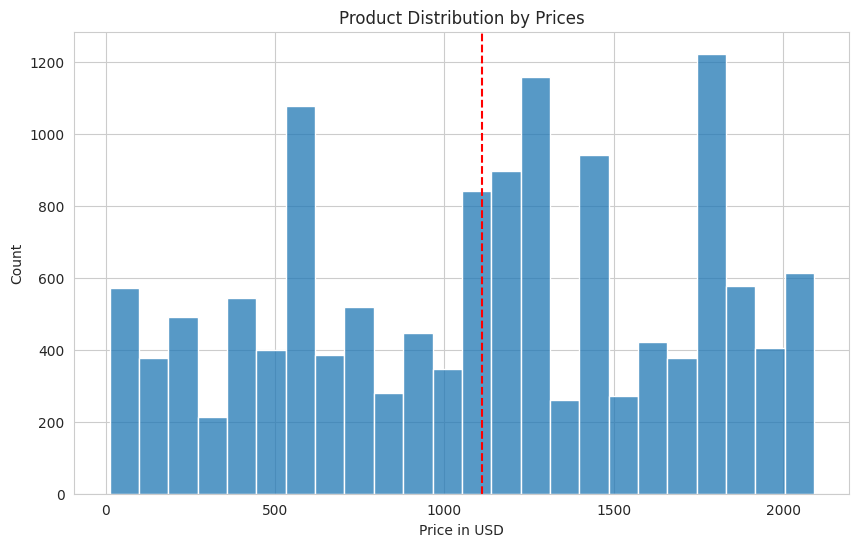

Mean:  1110.1365079248608


In [ ]:
# Product Distribution by Prices

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='list_price')
plt.title('Product Distribution by Prices')
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.axvline(MasterClean['list_price'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['list_price'].mean())

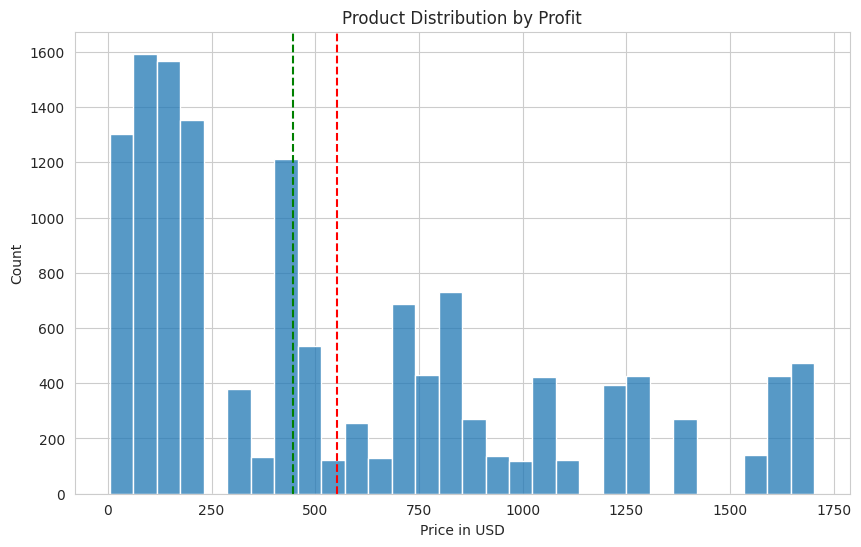

Mean:  552.2205679483417
Median:  445.2099999999999


In [ ]:
# Product Distribution by Profit

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='profit')
plt.title('Product Distribution by Profit')
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.axvline(MasterClean['profit'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(MasterClean['profit'].median(), color='green', linestyle='--', label='Median')
plt.show()

print('Mean: ', MasterClean['profit'].mean())
print('Median: ', MasterClean['profit'].median())

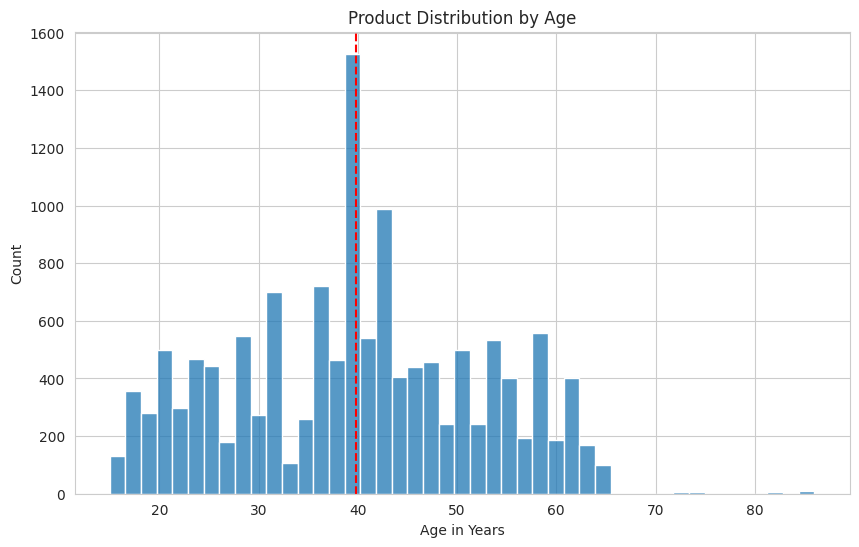

Mean:  39.8009245670678


In [ ]:
# Product Distribution by age

import matplotlib.pyplot as plt
import seaborn as sns

# Convert customer_age to int64 instead of Int64
MasterClean['customer_age'] = MasterClean['customer_age'].astype('int64')

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='customer_age')
plt.title('Product Distribution by Age')
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.axvline(MasterClean['customer_age'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['customer_age'].mean())


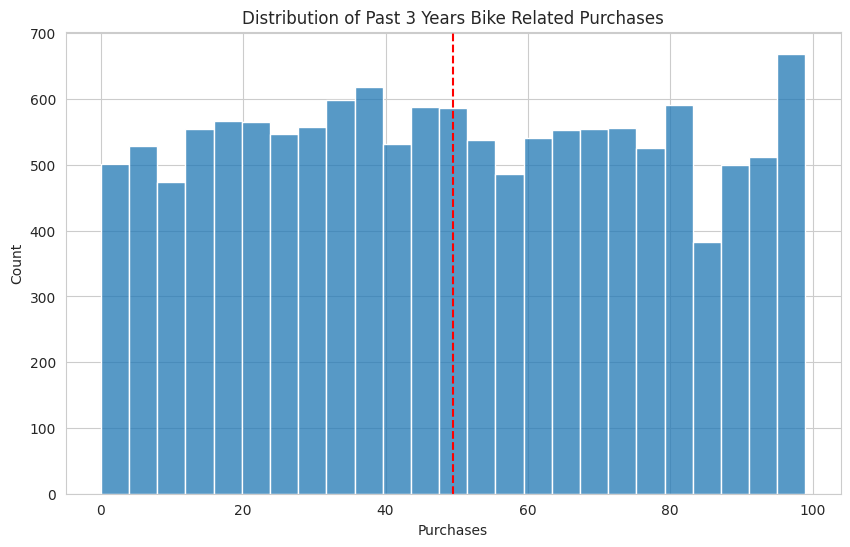

Mean:  49.495450542999706


In [ ]:
# Product Distribution by age

import matplotlib.pyplot as plt
import seaborn as sns

# Convert customer_age to int64 instead of Int64
MasterClean['past_3_years_bike_related_purchases'] = MasterClean['past_3_years_bike_related_purchases'].astype('int64')

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='past_3_years_bike_related_purchases')
plt.title('Distribution of Past 3 Years Bike Related Purchases')
plt.xlabel('Purchases')
plt.ylabel('Count')
plt.axvline(MasterClean['past_3_years_bike_related_purchases'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['past_3_years_bike_related_purchases'].mean())

age_group
31-50    52.355445
14-30    25.476959
51-70    21.969475
71-90     0.198122
Name: proportion, dtype: float64


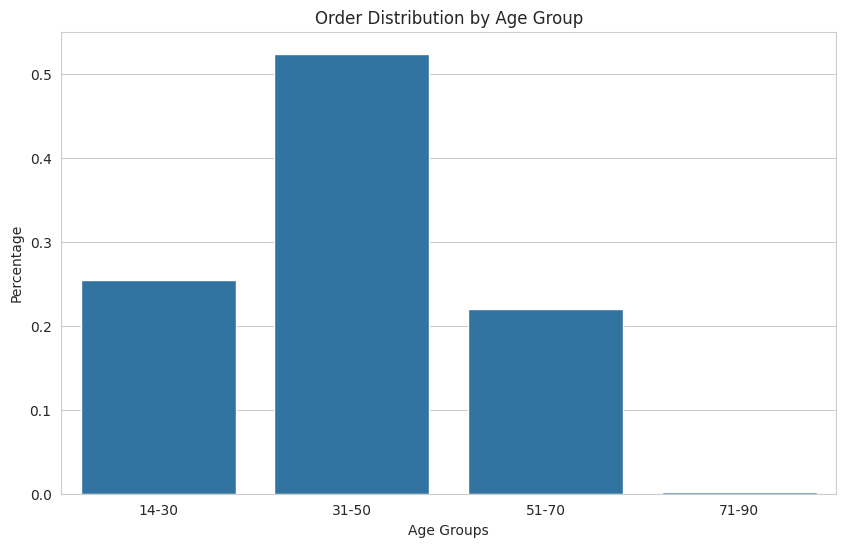

In [ ]:
# Order Distribution by Age Group

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
base_color = sns.color_palette()[0]

counts = MasterClean['age_group'].value_counts(normalize=True)
sns.barplot(x= counts.index, y=counts.values, color=base_color)
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
print(counts * 100)

plt.title('Order Distribution by Age Group')
plt.show()

  age_group      profit
0     14-30  1916582.54
1     31-50  3944529.54
2     51-70  1648972.98
3     71-90    15576.84


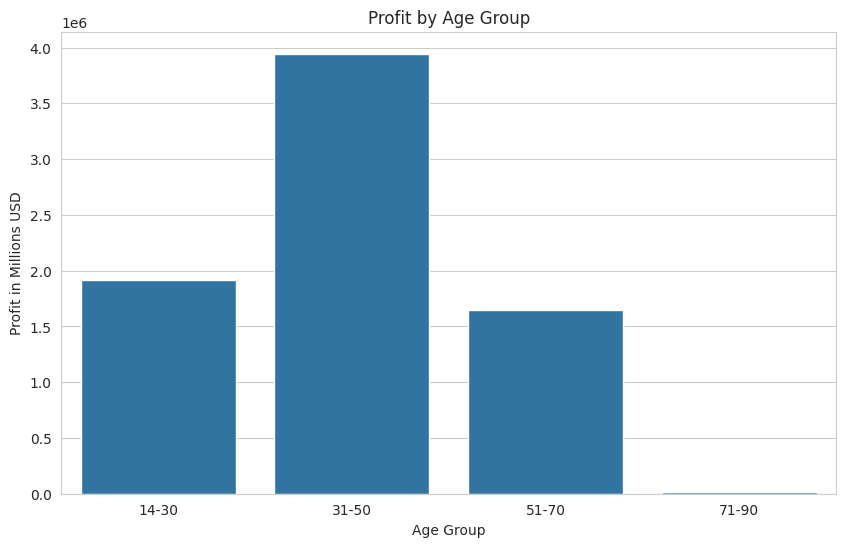

In [ ]:
# Profit Distribution by Age Group

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
base_color = sns.color_palette()[0]
profit_by_age = MasterClean.groupby('age_group')['profit'].sum().reset_index()
sns.barplot(x='age_group', y='profit', data=profit_by_age, color=base_color)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Profit in Millions USD')
plt.title('Profit by Age Group')

print(profit_by_age.head())

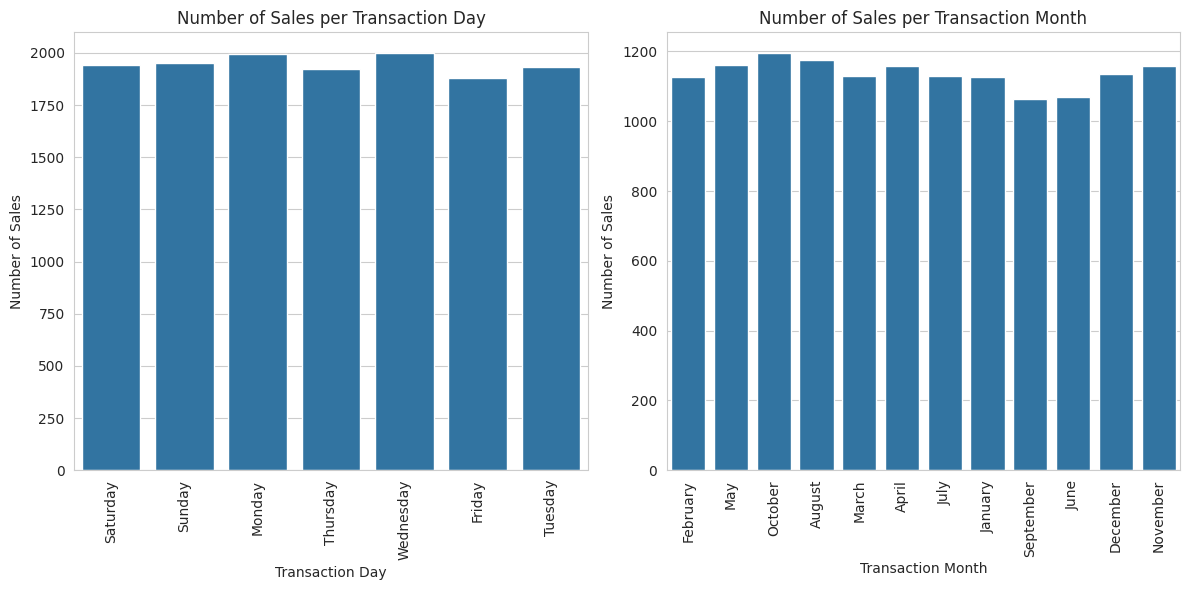

In [ ]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Bar plot for transaction day
plt.subplot(1, 2, 1)  # Subplot 1
sns.countplot(data=MasterClean, x='transaction_day', color=base_color)
plt.title('Number of Sales per Transaction Day')
plt.xticks(rotation=90)
plt.xlabel('Transaction Day')
plt.ylabel('Number of Sales')

# Bar plot for transaction month
plt.subplot(1, 2, 2)  # Subplot 2
sns.countplot(data=MasterClean, x='transaction_month', color=base_color)
plt.title('Number of Sales per Transaction Month')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

wealth_segment
Mass Customer        49.713824
High Net Worth       25.447608
Affluent Customer    24.838568
Name: proportion, dtype: float64


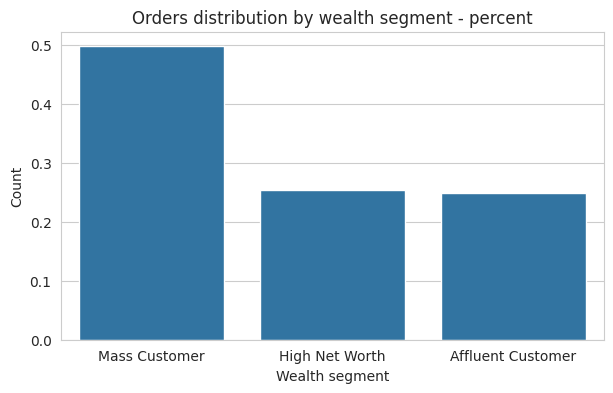

In [ ]:
#Orders distribution by wealth segment
plt.figure(figsize = (7,4), dpi = 100)

counts = MasterClean['wealth_segment'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Wealth segment')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by wealth segment - percent")
plt.show()

state
NSW    52.839742
VIC    25.036689
QLD    22.050191
ACT     0.073378
Name: proportion, dtype: float64


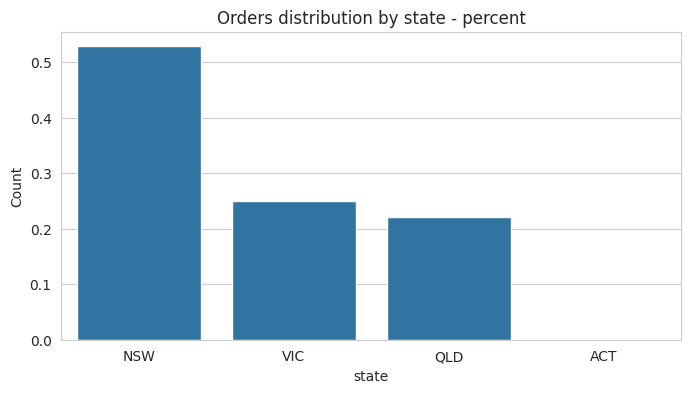

In [ ]:
# Orders distribution by state
plt.figure(figsize = (8,4), dpi = 100)
counts = MasterClean['state'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('state')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by state - percent")
plt.show()

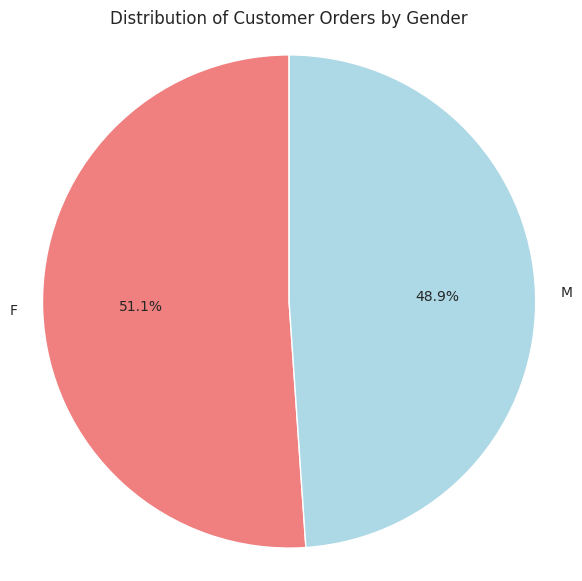

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7), dpi=100)

counts = MasterClean['gender'].value_counts(normalize=True)
labels = counts.index
sizes = counts.values
colors = ['lightcoral', 'lightblue']  # You can customize the colors here

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title("Distribution of Customer Orders by Gender")
plt.show()

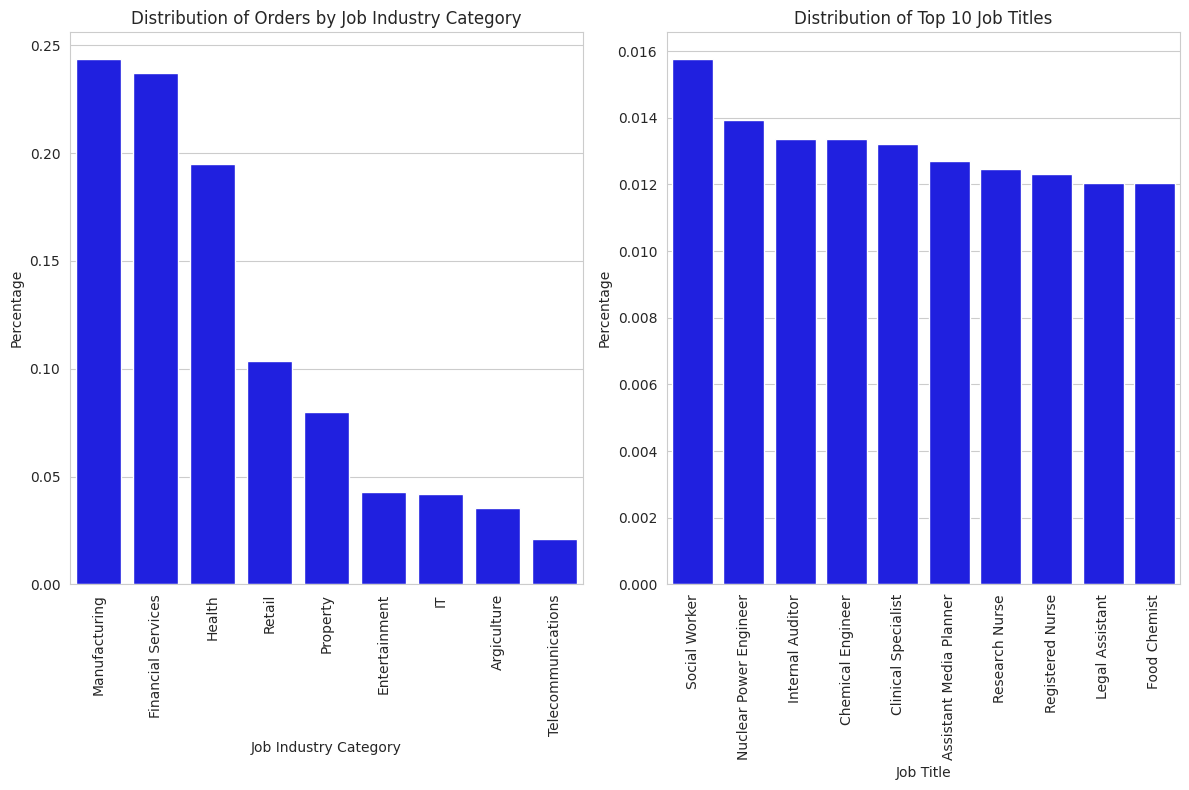

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))

# Plotting the distribution of orders by job industry category
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
counts_industry = MasterClean['job_industry_category'].value_counts(normalize=True)
sns.barplot(x=counts_industry.index, y=counts_industry.values, color='b')
plt.xlabel('Job Industry Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.title("Distribution of Orders by Job Industry Category")

# Plotting the distribution of top 10 job titles
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
top_10_titles = MasterClean['job_title'].value_counts(normalize=True).head(10)
sns.barplot(x=top_10_titles.index, y=top_10_titles.values, color='b')
plt.xlabel('Job Title')
plt.ylabel('Percentage')
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.title("Distribution of Top 10 Job Titles")

plt.tight_layout()  # To prevent overlapping labels and titles
plt.show()

## Bivariate Analysis
In this section we will investigate pair of variables and check if there is any relationship between them.

### Highlights from the Bivariate Analysis
- More of women who own a car buy bikes, and more of men who do not own a car buy bikes
- NSW has the highest number of bike buyers and more Female buyers than male buyers
- More women buy bikes online than men
- Most profitable brand is WeareA2B

These are usually best left to dashboards since it requires too much code to plot in pandas.

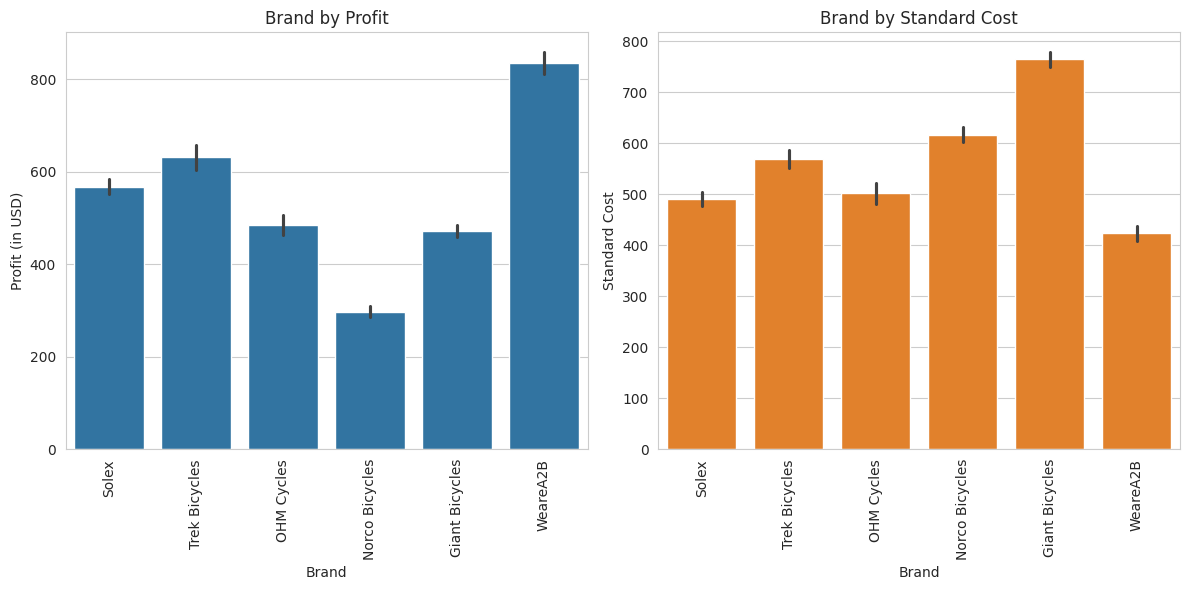

In [ ]:
# Brand by Profit and Standard Cost

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))

# First subplot - Profit by Brand
plt.subplot(1, 2, 1)
sns.barplot(data=MasterClean, x="brand", y='profit', color=sns.color_palette()[0])
plt.xlabel('Brand')
plt.ylabel('Profit (in USD)')
plt.xticks(rotation=90)
plt.title("Brand by Profit")

# Second subplot - Standard Cost by Brand
plt.subplot(1, 2, 2)
sns.barplot(data=MasterClean, x="brand", y='standard_cost', color=sns.color_palette()[1])
plt.xlabel('Brand')
plt.ylabel('Standard Cost')
plt.xticks(rotation=90)
plt.title("Brand by Standard Cost")

plt.tight_layout()
plt.show()

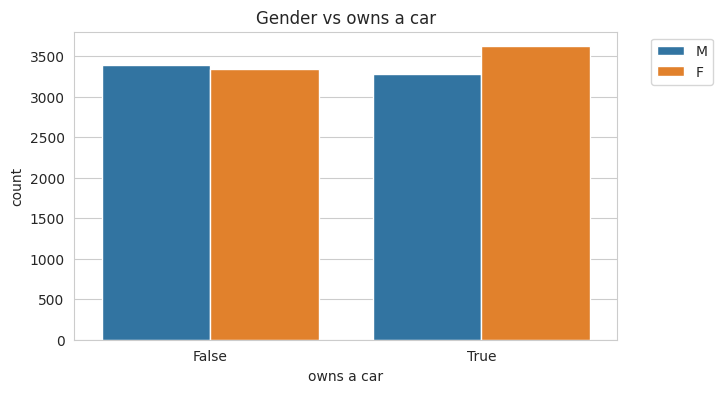

In [ ]:
#Gender vs owns a car

plt.figure(figsize = (7,4), dpi = 100)

sns.countplot(data = MasterClean, x = "owns_car",hue='gender')
plt.xlabel('owns a car');
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Gender vs owns a car")

plt.show()

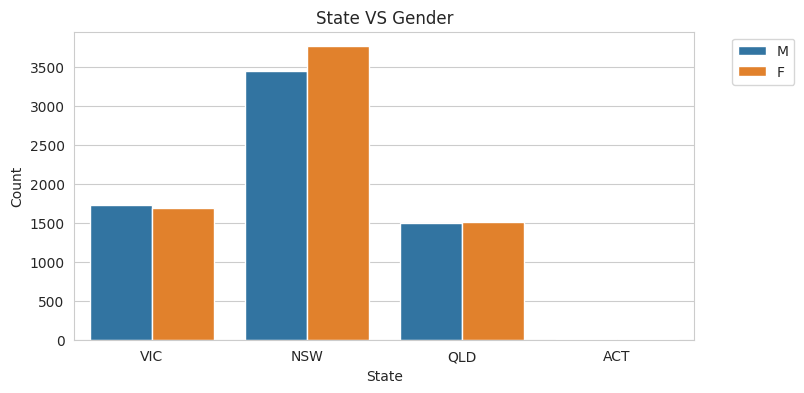

In [ ]:
#State vs Gender

plt.figure(figsize = (8,4), dpi = 100)

sns.countplot(data = MasterClean, x = "state",hue='gender')
plt.xlabel('State');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("State VS Gender")

plt.show()

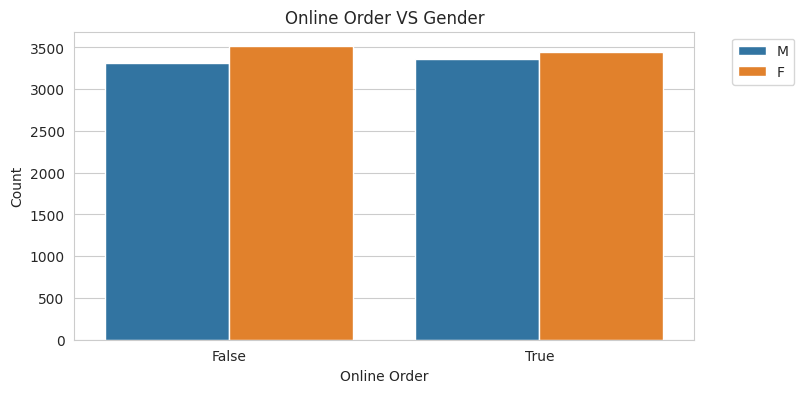

In [ ]:
#State vs Gender

plt.figure(figsize = (8,4), dpi = 100)

sns.countplot(data = MasterClean, x = "online_order",hue='gender')
plt.xlabel('Online Order');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Online Order VS Gender")

plt.show()

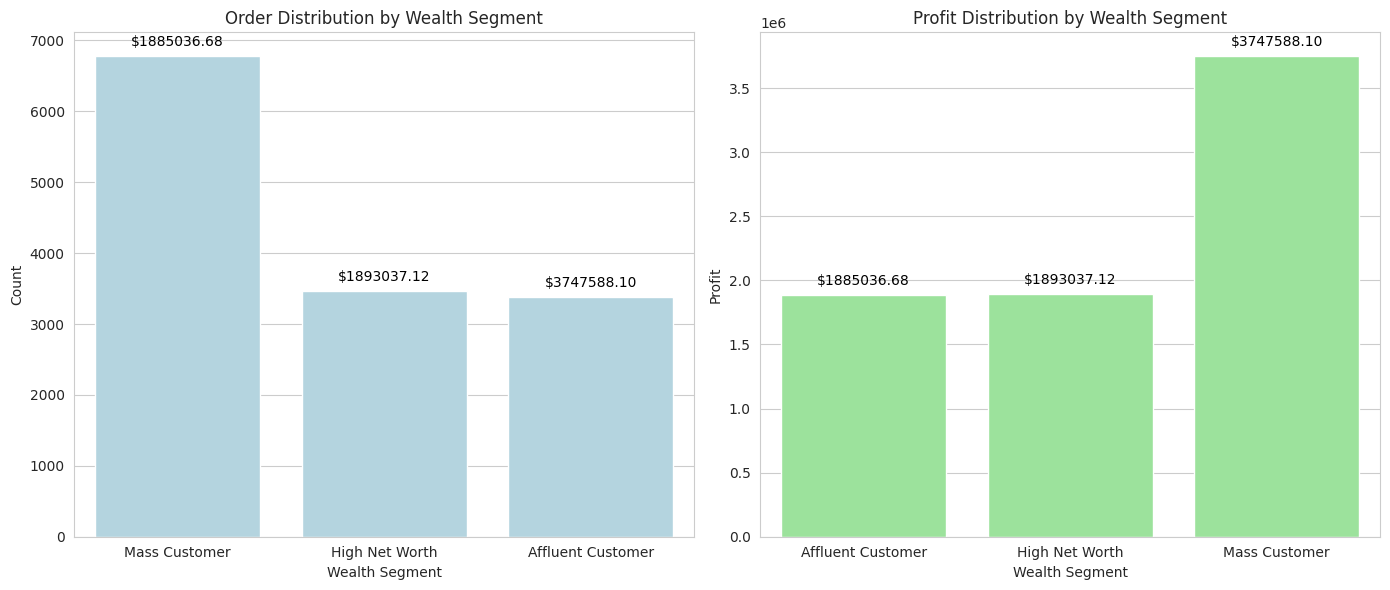

In [ ]:
# Wealth Segment Percentage and Profits

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

# Calculate the order count and profit per wealth segment
counts = MasterClean['wealth_segment'].value_counts()
profits = MasterClean.groupby('wealth_segment')['profit'].sum()

# Normalize the counts to percentages
counts_percent = (counts / counts.sum()) * 100

# Create a bar plot for order distribution
sns.barplot(x=counts_percent.index, y=counts.values, color='lightblue', ax=ax1)
ax1.set_xlabel('Wealth Segment')
ax1.set_ylabel('Count')
ax1.set_title("Order Distribution by Wealth Segment")

# Add profit labels to the bars in the order distribution plot
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'${profits[i]:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Create a bar plot for profit distribution
sns.barplot(x=profits.index, y=profits.values, color='lightgreen', ax=ax2)
ax2.set_xlabel('Wealth Segment')
ax2.set_ylabel('Profit')
ax2.set_title("Profit Distribution by Wealth Segment")

# Add profit labels to the bars in the profit distribution plot
for i, p in enumerate(ax2.patches):
    ax2.annotate(f'${profits[i]:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

## Multivariate Analysis
In this section we will use correlation matrix to find the correlation between the variables.
Nothing of what we already don't know.

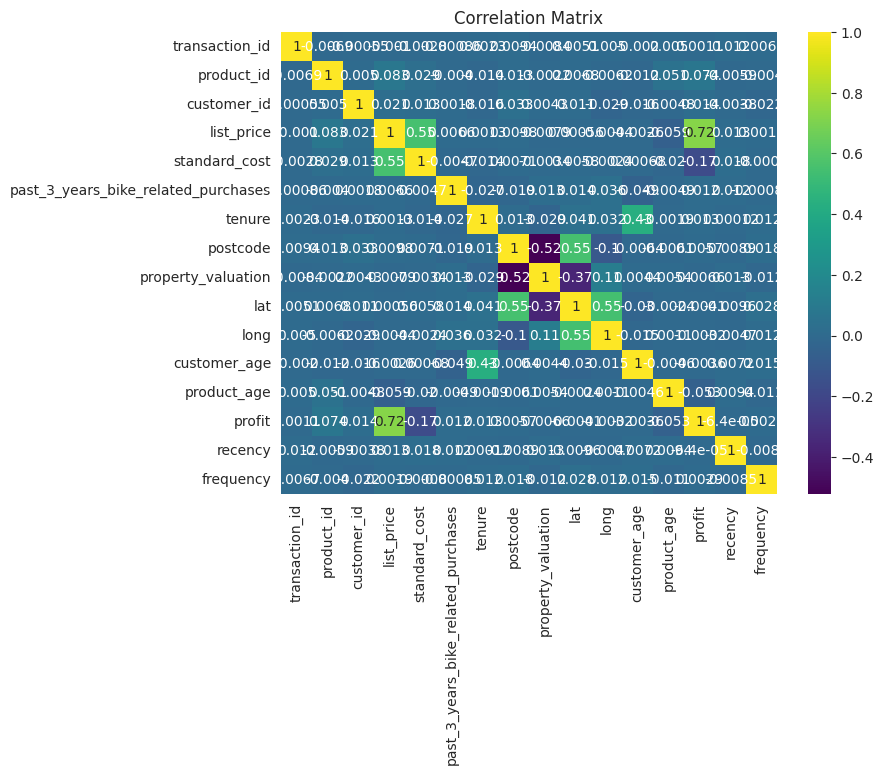

In [ ]:
# Drop non-numeric columns or encode them properly
numeric_columns = MasterClean.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the correlation matrix heatmap
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(correlation_matrix, cmap="viridis", annot=True)
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.show()

# Task 2 : RFM Analysis
RFM stands for Recency, Frequency and Monetary Value, it is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
This will include the following steps:
- Calculating the `recency` column i.e the number of days since the last purchase
- Calculating the `frequency` column i.e the number of purchases made by a unique customer
- Calculating the `monetary` column i.e the total amount of money spent by a unique customer
- Making the `RFM` dataframe by merging the three columns

Usually we would calculate an RFM score which is also fairly easy to do, but we will be using K-Means clustering to make customer segments instead.
We will be using standard scaler and elbow method to find the optimal number of clusters.

### Creating the RFM Table
- Since we already have the `recency`, `frequency` and `profit` columns, we can make the RFM table by merging them.
- We will later map them to the master dataframe


In [ ]:
# Generating the RFM Table
RfmTable = Postcoded.groupby("customer_id").agg(
    {
        "recency": lambda x: x.min(),
        "frequency": lambda x: x.count(),
        "profit": lambda x: x.sum(),
    }
)

RfmTable.rename(
    columns={
        "recency": "recency",
        "frequency": "frequency",
        "profit": "monetary",
    },
    inplace=True,
)

RfmTable.head()

recency  frequency  monetary
customer_id                              
1                  9         11   3018.09
2                130          3   2226.26
4                197          2    220.57
5                 18          6   2394.94
6                 66          5   3946.55

### Finding the Optimal Number of Clusters
- We wrote a function to scale the features (using standard scaler)
- We wrote a function to fit the KMeans algorithm on the scaled features and return the model as well as the predictions
- Make sure to run this only on the clean rfm dataframe

The elbow methods shows that the optimal number of clusters is 3, so we will classify each customer into one of these clusters.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def plot_elbow_method(df):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)

    inertia = []
    for i in np.arange(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=1) # n_init is the number of times the K-mean algorithm will run with different centroid seeds (default=10), explicityly set to 10 to suppress warning
        kmeans.fit(scaled)
        inertia.append(kmeans.inertia_)

    plt.plot(np.arange(1, 11), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    return scaled

# Example usage:
# Assuming you have a DataFrame called 'rfm_table', you can call the function like this:
# plot_elbow_method(rfm_table)

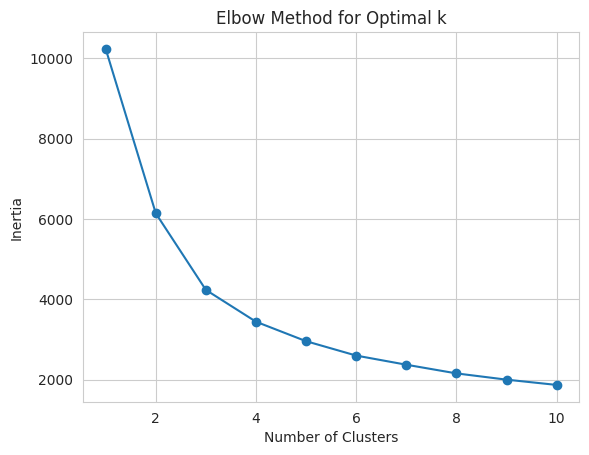

In [ ]:
scaled_array = plot_elbow_method(RfmTable)

### Classifying the Customers
Now that we have the clusters, we will analyse the clusters and see which cluster has the highest profit, and then we will map the customer IDs to the clusters and then predict the high value customers.

- Gold customers are comparatively less in number but have the highest profit
- Silver customers are the most in number but struggle to keep up with the gold customers
- Bronze customers are the least in number, have the best profit to customer ratio but have the lowest overall profit
- Also Bronze customers very rarely buy any products

In [ ]:
# Use k-means to cluster the RFM table

kmeans = KMeans(n_clusters=3, n_init=10, random_state=10)
kmeans.fit(scaled_array)

# +1 to make the clusters start from 1 instead of 0
RfmTable['cluster'] = kmeans.labels_+1
RfmTable.head()

recency  frequency  monetary  cluster
customer_id                                       
1                  9         11   3018.09        2
2                130          3   2226.26        3
4                197          2    220.57        3
5                 18          6   2394.94        1
6                 66          5   3946.55        1

In [ ]:
# Using a ClusterMap to group clusters by their average RFM values

ClusterMap = RfmTable.groupby("cluster").agg(
    {
        "recency": "mean",
        "frequency": "mean",
        "monetary": "mean",
    }
)
ClusterMap["cluster_size"] = RfmTable.groupby("cluster")["cluster"].count()

# Sorting the ClusterMap by monetary_value in descending order
SortedClusterMap = ClusterMap.sort_values(by="monetary", ascending=False)

# Preparing the customer_category column
# customer_category = ["Platinum","Gold", "Silver", "Bronze"]
customer_category = ["Gold", "Silver", "Bronze"]
SortedClusterMap["customer_category"] = customer_category

CategoryCluster = SortedClusterMap["customer_category"].to_dict()

SortedClusterMap

recency  frequency     monetary  cluster_size customer_category
cluster                                                                    
2         40.156137   8.150722  5023.386372          1108              Gold
1         43.959677   4.846198  2312.542056          1736            Silver
3        166.327465   3.642606  1871.216673           568            Bronze

### Visualizing the Clusters
- We will make an interactive cluster plot using plotly and see if we can find any insights.
- We will also use seaborn to make a cluster plot.


In [ ]:
# Using Plotly to plot the ClusterMap

import plotly.express as px

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    RfmTable,
    x='recency',
    y='frequency',
    z='monetary',
    color='cluster',
    size_max=10,
    opacity=0.7,
    labels={'recency': 'Recency', 'frequency': 'Frequency', 'monetary': 'Monetary'},
    title='RFM Clusters - Interactive 3D Scatter Plot'
)

fig.show()

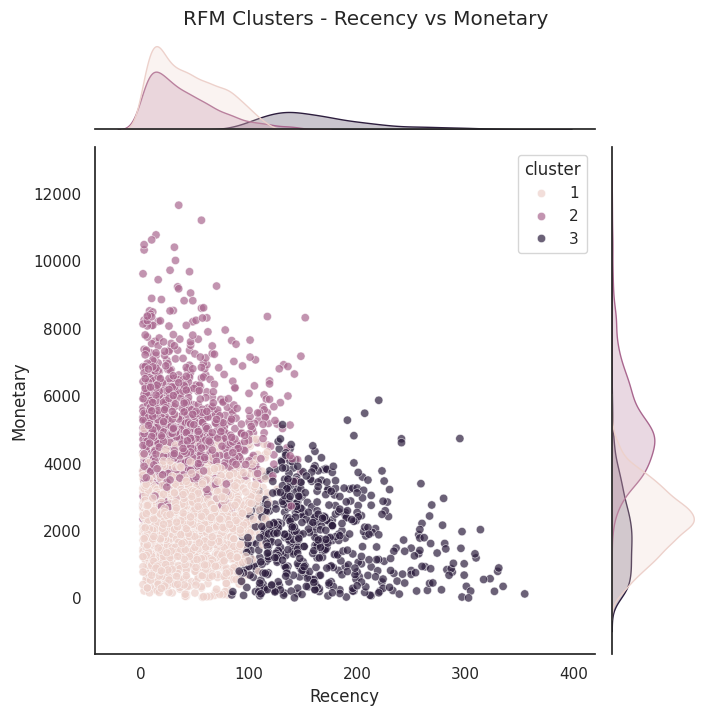

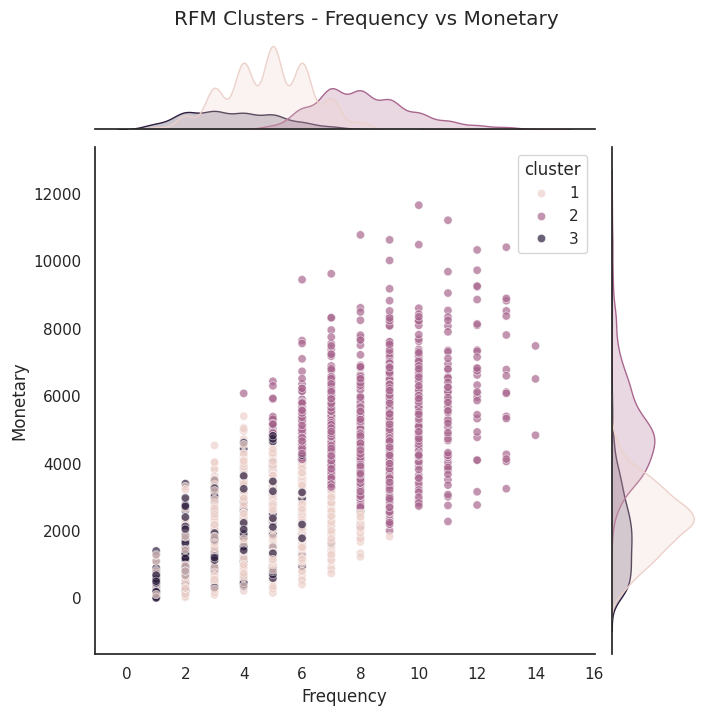

In [ ]:
# Using SeaBorn to plot the ClusterMap

import seaborn as sns
import matplotlib.pyplot as plt

# Create a joint plot for 'recency' and 'monetary'
sns.set(style="white")
fig1 = sns.jointplot(
    data=RfmTable,
    x='recency',
    y='monetary',
    hue='cluster',
    alpha=0.7,
    markers=["o", "s", "D"],
    height=7
)
fig1.set_axis_labels('Recency', 'Monetary')
fig1.fig.suptitle('RFM Clusters - Recency vs Monetary', y=1.02)

# Create a joint plot for 'frequency' and 'monetary'
fig2 = sns.jointplot(
    data=RfmTable,
    x='frequency',
    y='monetary',
    hue='cluster',
    alpha=0.7,
    markers=["o", "s", "D"],
    height=7
)
fig2.set_axis_labels('Frequency', 'Monetary')
fig2.fig.suptitle('RFM Clusters - Frequency vs Monetary', y=1.02)

# Display the subplots
plt.show()

### Mapping the Clusters to the Master Dataframe
- This will add two new columns to the master dataframe, `cluster` and `customer_category`

In [ ]:
# Mapping the clusters to the customers
Postcoded['cluster'] = Postcoded['customer_id'].map(RfmTable['cluster'])
Postcoded['customer_category'] = Postcoded['cluster'].map(CategoryCluster)

In [ ]:
Postcoded.sample(5)

transaction_id  product_id  customer_id transaction_date online_order  \
8502             8514          14         1417       2017-04-06        False   
16524           16548          47         2490       2017-11-22          NaN   
956               958          15          233       2017-12-13         True   
907               909          27          399       2017-04-20        False   
2227             2229          64         1051       2017-03-22         True   

       order_status           brand product_line product_class product_size  \
8502           True           Solex     Standard          high        large   
16524          True   Trek Bicycles         Road           low        small   
956            True  Norco Bicycles     Standard           low       medium   
907            True   Trek Bicycles     Standard        medium       medium   
2227           True  Giant Bicycles     Standard          high        small   

       list_price  standard_cost    product_first_sold_date first_name  \
8502      1842.92        1105.75 2003-12-30 11:24:31.255495      Micki   
16524     1720.70        1531.42 1994-11-14 11:24:31.255495      Clint   
956        958.74         748.90 1998-11-26 11:24:31.255495        Art   
907        499.53         388.72 1996-03-06 11:24:31.255495     Nickie   
2227      1977.36        1759.85 2003-08-09 11:24:31.255495      Xylia   

      last_name gender  past_3_years_bike_related_purchases        DOB  \
8502     Russel      F                                   12 1959-11-14   
16524    Krause      M                                   28 1987-10-01   
956     Barwell      M                                   34 1986-08-08   
907     Neissen      M                                   26 1976-07-18   
2227      Lange      F                                   34 1977-09-29   

                  job_title job_industry_category     wealth_segment  \
8502                    NaN         Manufacturing     High Net Worth   
16524                   NaN                Health      Mass Customer   
956      Environmental Tech              Property      Mass Customer   
907            Engineer III         Manufacturing  Affluent Customer   
2227   Help Desk Technician              Property     High Net Worth   

      deceased_indicator owns_car  tenure              address  postcode  \
8502               False     True      20     83758 Kings Hill      2770   
16524              False     True       5      711 Hayes Court      2120   
956                False    False      13  2 Northridge Street      2508   
907                False     True      16   47226 Algoma Place      4305   
2227               False     True      14    5271 Vernon Court      3207   

         country  property_valuation        lat        long state  \
8502   Australia                   7 -33.756443  150.810246   NSW   
16524  Australia                  10 -33.731105  151.073590   NSW   
956    Australia                  10 -34.230944  150.969679   NSW   
907    Australia                   3 -27.627522  152.753696   QLD   
2227   Australia                  10 -37.832179  144.918044   VIC   

       customer_age  product_age age_group  profit  recency  frequency  \
8502             58         14.0     51-70  737.17      270          7   
16524            30         23.0     14-30  189.28       40          5   
956              31         19.0     31-50  209.84       19          6   
907              41         21.0     31-50  110.81      256          6   
2227             40         14.0     31-50  217.51      285          5   

      transaction_day transaction_week transaction_month  cluster  \
8502         Thursday               14             April        2   
16524       Wednesday               47          November        1   
956         Wednesday               50          December        1   
907          Thursday               16             April        2   
2227        Wednesday               12             March        3 

# Task 2 : Geospatial Analysis
In this section we will only focus on geopandas and try to make customer segmentation maps.
- ~~We will also try to geocode the customer adresses to get another lat and long column `geo_lat` and `geo_long`~~
- Geocoding will take a lot of time so we'll just work the with the coordinates we already have


Seems like our most sales are in coastal areas, with that lovely view guess I'll buy a bike too.

- We will make a new column `distance_from_coast` which will be the distance of the customer from the coast
- NSW has the most sales, and the most sales are in the coastal areas of NSW
- Followed by Victoria and then Queensland

In [ ]:
# Pepraring the GeoCustomers dataframe
# We will use this to draw interactive maps

GeoCustomers = Postcoded.copy()

# Use groupby to get unique customer_id
GeoCustomers = GeoCustomers.groupby('customer_id').first().reset_index()
GeoCustomers = GeoCustomers[['customer_id', 'lat', 'long', 'state', 'cluster', 'customer_category']]

GeoCustomers.head()

customer_id        lat        long state  cluster customer_category
0            1 -33.894912  151.206211   NSW        2              Gold
1            2 -33.731651  150.955942   NSW        3            Bronze
2            4 -28.035453  153.241258   QLD        3            Bronze
3            5 -30.604667  152.956681   NSW        1            Silver
4            6 -38.215906  144.334005   VIC        1            Silver

### Marker Cluster

In [ ]:
# Importing Folium and Geopandas
import geopandas as gpd
import folium

# Importing folium plugins
from folium.plugins import MarkerCluster, HeatMap

# Creating a simple map
m_1 = folium.Map(location=[-25.2744, 133.7751], tiles='cartodbpositron', zoom_start=4)

# Adding transaction points to the map using MarkerCluster
mc = MarkerCluster()
for idx, row in GeoCustomers.iterrows():
    if not np.isnan(row['lat']) and not np.isnan(row['long']):
        mc.add_child(folium.Marker([row['lat'], row['long']]))

m_1.add_child(mc)

# Display the map
m_1

### <a id='toc5_1_2_'></a>[Heatmap](#toc0_)

In [ ]:
# Drawing a heatmap of the transaction points
m_2 = folium.Map(location=[-25.2744, 133.7751], tiles='cartodbpositron', zoom_start=4)

# Adding transaction points to the map using HeatMap
HeatMap(data=GeoCustomers[['lat', 'long']], radius=15).add_to(m_2)

# Display the map
m_2


### <a id='toc5_1_3_'></a>[Bubble Map](#toc0_)

In [ ]:
# Draw a bubble map to visualize the customer catergories gold, silver and bronze

# Create a base map
m_3 = folium.Map(location=[-25.2744, 133.7751], tiles='cartodbpositron', zoom_start=4)

# Add a bubble map to the base map
for idx, row in GeoCustomers.iterrows():
    if not np.isnan(row['lat']) and not np.isnan(row['long']):
        if row['customer_category'] == 'Gold':
            folium.CircleMarker([row['lat'], row['long']], radius=5, color='yellow', fill=True).add_to(m_3)
        elif row['customer_category'] == 'Silver':
            folium.CircleMarker([row['lat'], row['long']], radius=5, color='blue', fill=True).add_to(m_3)
        elif row['customer_category'] == 'Bronze':
            folium.CircleMarker([row['lat'], row['long']], radius=5, color='brown', fill=True).add_to(m_3)

# Display the map
m_3


### Analysing Coastline Proximity

Shortest Distance to a Coastline¶
A visual guide using geopandas, shapely and folium

I was given the data of a Bicycle company, on analysing it I found out people on the coastlines are more likely to buy a bicycle than people who live in the interior. So I tried to find out the shortest distance to the coastline from each point in the dataset.

This would give me a really nice feature to add to my model


In [ ]:
GeoCustomers

customer_id        lat        long state  cluster customer_category
0               1 -33.894912  151.206211   NSW        2              Gold
1               2 -33.731651  150.955942   NSW        3            Bronze
2               4 -28.035453  153.241258   QLD        3            Bronze
3               5 -30.604667  152.956681   NSW        1            Silver
4               6 -38.215906  144.334005   VIC        1            Silver
...           ...        ...         ...   ...      ...               ...
3407         3496 -33.937716  150.848737   NSW        3            Bronze
3408         3497 -38.043995  145.264296   VIC        1            Silver
3409         3498 -37.807135  144.861162   VIC        3            Bronze
3410         3499 -27.549179  152.951385   QLD        2              Gold
3411         3500 -33.766409  151.257781   NSW        3            Bronze

[3412 rows x 6 columns]

In [ ]:
!pip install haversine

# Download the shapefile (replace with the actual download link)
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip

# Unzip the file
!unzip ne_110m_admin_0_countries.zip


--2025-01-13 12:40:01--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.144.25, 52.92.186.193, 52.92.132.177, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.144.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K  --.-KB/s    in 0.1s    

2025-01-13 12:40:01 (1.91 MB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_countr

In [ ]:
from shapely.ops import nearest_points, Point
import haversine as hs
from haversine import Unit
import geopandas as gpd # Import geopandas

def coastline_minima(df, lat_col, long_col, country):
    """
    This function takes in a dataframe with latitude and longitude columns and returns the nearest point on the coastline and the distance in km

    Required libraries: geopandas, shapely, folium, haversine
    Returns: original dataframe with two new columns: nearest_point and distance_to_coast

    """
    # Getting the coastline
    # Read the shapefile into a GeoDataFrame
    world = gpd.read_file("ne_110m_admin_0_countries.shp")


    coastline = world[world['ADMIN'].str.contains(country, case=False)].boundary # Changed line, using 'ADMIN' column and ignoring case

    # Creating empty lists to store the nearest point and the distance
    nearest_points_list = []
    distance_list = []

    for i in range(len(df)):
        geo = Point(df[long_col][i], df[lat_col][i])
        nearest = nearest_points(geo, coastline)[1]
        cos = Point(nearest.x, nearest.y)
        loc1 = (geo.y, geo.x)
        loc2 = (cos.y, cos.x)
        result = hs.haversine(loc1, loc2, unit=Unit.KILOMETERS)

        nearest_points_list.append(nearest)
        distance_list.append(result)

    # Adding the new columns to the dataframe
    df["nearest_point"] = nearest_points_list
    df["distance_to_coast"] = distance_list

    return df

In [ ]:
coastline_minima(GeoCustomers, 'lat', 'long', 'Australia')
GeoCustomers.head()


customer_id        lat        long state  cluster customer_category  \
0            1 -33.894912  151.206211   NSW        2              Gold   
1            2 -33.731651  150.955942   NSW        3            Bronze   
2            4 -28.035453  153.241258   QLD        3            Bronze   
3            5 -30.604667  152.956681   NSW        1            Silver   
4            6 -38.215906  144.334005   VIC        1            Silver   

                                       nearest_point  distance_to_coast  
0  137    POINT (151.26433 -33.93411)
dtype: geom...           6.910553  
1  137    POINT (151.26176 -33.93792)
dtype: geom...          36.385439  
2  137    POINT (153.45911 -27.91328)
dtype: geom...          25.342373  
3  137    POINT (153.07812 -30.60035)
dtype: geom...          11.632766  
4  137    POINT (144.33147 -38.21284)
dtype: geom...           0.406144

In [ ]:
# Merging Geocustomers dataframe with the Postcoded dataframe

Postcoded = pd.merge(
    Postcoded,
    GeoCustomers[['customer_id', 'nearest_point', 'distance_to_coast']],
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)


In [ ]:
Postcoded.sample(5)

transaction_id  product_id  customer_id transaction_date online_order  \
14763           15119          46         3386       2017-10-07         True   
7548             7718          59          109       2017-02-23        False   
12344           12640          15          231       2017-01-29         True   
11429           11704           4          109       2017-01-19         True   
5794             5934          74         3475       2017-06-25         True   

       order_status           brand product_line product_class product_size  \
14763          True      OHM Cycles     Standard           low       medium   
7548           True           Solex     Standard        medium        large   
12344          True  Norco Bicycles     Standard           low       medium   
11429          True  Giant Bicycles     Standard          high       medium   
5794           True        WeareA2B     Standard        medium       medium   

       list_price  standard_cost    product_first_sold_date first_name  \
14763     1793.43         248.82 1992-07-08 11:24:31.255495      Cliff   
7548      1061.56         733.58 1998-10-11 11:24:31.255495       Cody   
12344      958.74         748.90 1987-08-29 11:24:31.255495     Basile   
11429     1129.13         677.48 2004-08-17 11:24:31.255495       Cody   
5794      1228.07         400.91 1993-05-11 11:24:31.255495    Correna   

        last_name gender  past_3_years_bike_related_purchases        DOB  \
14763       Nolin      M                                   24 1999-07-28   
7548       Blabey      M                                   16 1978-12-11   
12344      Winsor      M                                   48 1995-08-05   
11429      Blabey      M                                   16 1978-12-11   
5794   Goldsberry      F                                   12 1985-08-31   

                 job_title job_industry_category     wealth_segment  \
14763  Structural Engineer                    IT     High Net Worth   
7548   Marketing Assistant                   NaN  Affluent Customer   
12344      Design Engineer    Financial Services      Mass Customer   
11429  Marketing Assistant                   NaN  Affluent Customer   
5794     Director of Sales                Retail  Affluent Customer   

      deceased_indicator owns_car  tenure                 address  postcode  \
14763              False     True       2        367 Talmadge Way      2705   
7548               False     True       4         41 Service Lane      2217   
12344              False     True       3  11667 Blackbird Street      2226   
11429              False     True       4         41 Service Lane      2217   
5794               False    False       3          1 Michigan Way      2153   

         country  property_valuation        lat        long state  \
14763  Australia                   1 -34.489867  146.373471   NSW   
7548   Australia                  11 -33.974354  151.140345   NSW   
12344  Australia                  10 -34.009345  151.063808   NSW   
11429  Australia                  11 -33.974354  151.140345   NSW   
5794   Australia                  10 -33.731651  150.955942   NSW   

       customer_age  product_age age_group   profit  recency  frequency  \
14763            18         25.0     14-30  1544.61       86          5   
7548             39         19.0     31-50   327.98      312         10   
12344            22         30.0     14-30   209.84      337          4   
11429            39         13.0     31-50   451.65      347         10   
5794             32         24.0     31-50   827.16      190          4   

      transaction_day transaction_week transaction_month  cluster  \
14763        Saturday               40           October        1   
7548         Thursday               08          February        2   
12344          Sunday               04           January        1   
11429        Thursday               03           January        2   
5794           Sunday               

# Model Development
Final task of this project, we will use all the data and features we built earlier and make a machine learning model to predict which customer segment the new customers will fall into.

We will build two models
- a simple logistic regression model
- a HistGradientBoostingClassifier model

We will also use RandomSearchCV to find the best parameters for the models.

## Data Preprocessing
Lets see what we are working with
- We have `Postcoded` as the Training Data
- We have `NewCustomerList` as the Testing Data

We need to add features to the testing data as well.

In [ ]:
Train = Postcoded.copy()
Train.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'country',
       'property_valuation', 'lat', 'long', 'state', 'customer_age',
       'product_age', 'age_group', 'profit', 'recency', 'frequency',
       'transaction_day', 'transaction_week', 'transaction_month', 'cluster',
       'customer_category', 'nearest_point', 'distance_to_coast'],
      dtype='object')

In [ ]:
Test = NewCustomerList.copy()
Test.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

## Feature Engineering
We'll be engineering the following features in the test data:
- customer_age
- age_group
- lat, long
- distance_to_coast

So basically we will only be expanding the DOB and postcode columns.
Lets also try and multiply the property_valuation with the tenure, that might do something.

And we will add two more features based on the Property Valuation and Tenure to both the Training and Testing Data

- tenure_valuation_mul
- tenure_valuation_div

And also `potential_customer_id` to the testing data

### Age and Age Group
- customer_age
- age_group

In [ ]:
# Customer Age Feature
Test["DOB"] = pd.to_datetime(Test["DOB"])
Test["customer_age"] = (end_date - Test["DOB"]).dt.days // 365.25
Test["customer_age"] = Test["customer_age"].astype("Int64")

# Keeping only the values between 14 and 100
Test = Test[Test["customer_age"].between(14, 100)]


In [ ]:
# Calculate the Age Group
age_group = pd.cut(
    Test["customer_age"],
    bins=[14,30,50,70,90],
    labels=["14-30","30-50","50-70","70-90"]
)

Test["age_group"] = age_group

### <a id='toc6_2_2_'></a>[Geo Location](#toc0_)
- lat
- long
- distance_to_coast
- state
- nearest_point

In [ ]:
# Adding the Coordinate Columns
Test = pd.merge(
    Test,
    Postcodes[['postcode', 'lat', 'long', 'state']],
    how="inner",
    left_on="postcode",
    right_on="postcode",
)

print(Test.shape)
print(Postcodes.shape)

# Dropping the state_x column
Test.drop(columns="state_x", inplace=True)
Test.rename(columns={"state_y": "state"}, inplace=True)

Test.sample(5)

(983, 23)
(3175, 4)


first_name last_name gender  past_3_years_bike_related_purchases  \
362       Gerik  Woodroof      M                                   18   
450  Marcellina   Baynton      F                                   60   
517      Antony      Tuma      M                                   11   
883      Hedwig     Jayme      F                                   38   
279       Verla  Dumingos      F                                   26   

           DOB              job_title job_industry_category  \
362 1959-06-13              Paralegal    Financial Services   
450 1947-03-11  Software Engineer III    Financial Services   
517 1954-03-10     Environmental Tech    Telecommunications   
883 1952-08-21          Accountant IV              Property   
279 1971-09-18        Design Engineer    Telecommunications   

        wealth_segment deceased_indicator owns_car  tenure  \
362     High Net Worth              False     True       9   
450      Mass Customer              False    False      16   
517     High Net Worth              False     True      13   
883  Affluent Customer              False    False      11   
279      Mass Customer              False     True      10   

                 address  postcode    country  property_valuation  Rank  \
362        41 Kropf Road      3175  Australia                   7   366   
450  56 Comanche Terrace      3141  Australia                  10   455   
517     93264 Almo Plaza      3078  Australia                  10   526   
883    6293 Hooker Point      2099  Australia                  10   899   
279     6784 Spohn Alley      3021  Australia                   8   282   

        Value  customer_age age_group        lat        long state  
362  0.975000            58     50-70 -38.016114  145.208504   VIC  
450  0.892500            70     50-70 -37.840679  144.991264   VIC  
517  0.833000            63     50-70 -37.778298  145.025853   VIC  
883  0.510000            65     50-70 -33.748914  151.279999   NSW  
279  1.049219            46     30-50 -37.743361  144.796693   VIC

In [ ]:
# Caculating the distance to coast
Test = coastline_minima(Test, 'lat', 'long', 'Australia')

### <a id='toc6_2_3_'></a>[Tenure and Property Valuation](#toc0_)
- tenure_valuation_mul
- tenure_valuation_div

In [ ]:
# Multiplying and Dividing the tenure and property_valuation

Train["tenure_valuation_mul"] = Train["tenure"] * Train["property_valuation"]
Train["tenure_valuation_div"] = Train["tenure"] / Train["property_valuation"]

# Same for Test

Test["tenure_valuation_mul"] = Test["tenure"] * Test["property_valuation"]
Test["tenure_valuation_div"] = Test["tenure"] / Test["property_valuation"]

### <a id='toc6_2_4_'></a>[Potential Customer ID](#toc0_)
- potential_customer_id

In [ ]:
Test['potential_customer_id'] = Test.index + 1

## <a id='toc6_3_'></a>[Building a Basic Logistic Regression Model](#toc0_)
- We will copy the training data to `data`
- Look out for leakage while building the model, drop all the columns that are not present in the testing data
- Also drop the columns that can't be classified as numerical or categorical

### <a id='toc6_3_1_'></a>[Feature Selection](#toc0_)
- defining `cols` with all the features that are supposed to go into data

In [ ]:
# Getting all the valid columns for building the model

cols = [
    "gender",
    "past_3_years_bike_related_purchases",
    "job_title",
    "job_industry_category",
    "wealth_segment",
    "deceased_indicator",
    "owns_car",
    "tenure",
    "property_valuation",
    "lat",
    "long",
    "state",
    "customer_age",
    "age_group",
    "distance_to_coast",
    "tenure_valuation_mul",
    "tenure_valuation_div",
    "customer_category",
]

data = Train[cols]

In [ ]:
# Defining the target variable

target_name = "customer_category"
target = data[target_name]

data = data.drop(columns=target_name)

### <a id='toc6_3_2_'></a>[Defining Categorical and Numerical Columns](#toc0_)
- We will convert all the datatypes appropriately so that there's only either objects or numbers in the dataframe
- We will use sklearns `make_column_selector` to select the columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19513 entries, 0 to 19512
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   gender                               19513 non-null  object  
 1   past_3_years_bike_related_purchases  19513 non-null  Int64   
 2   job_title                            17173 non-null  object  
 3   job_industry_category                16291 non-null  object  
 4   wealth_segment                       19513 non-null  object  
 5   deceased_indicator                   19513 non-null  object  
 6   owns_car                             19513 non-null  object  
 7   tenure                               19513 non-null  Int64   
 8   property_valuation                   19513 non-null  Int64   
 9   lat                                  19513 non-null  float64 
 10  long                                 19513 non-null  float64 
 11  state          

In [ ]:
# Convert age_group to object
data["age_group"] = data["age_group"].astype("object")

# Convert bools to object
bool_cols = data.columns[data.dtypes.eq("bool")]
data[bool_cols] = data[bool_cols].astype("object")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19513 entries, 0 to 19512
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               19513 non-null  object 
 1   past_3_years_bike_related_purchases  19513 non-null  Int64  
 2   job_title                            17173 non-null  object 
 3   job_industry_category                16291 non-null  object 
 4   wealth_segment                       19513 non-null  object 
 5   deceased_indicator                   19513 non-null  object 
 6   owns_car                             19513 non-null  object 
 7   tenure                               19513 non-null  Int64  
 8   property_valuation                   19513 non-null  Int64  
 9   lat                                  19513 non-null  float64
 10  long                                 19513 non-null  float64
 11  state                       

In [ ]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
category_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
category_columns = category_columns_selector(data)

# Print the lengths of numerical_columns, category_columns, and data.columns
print(f"Number of numerical columns: {len(numerical_columns)}")
print(f"Number of categorical columns: {len(category_columns)}")
print(f"Total number of columns: {len(data.columns)}")

Number of numerical columns: 9
Number of categorical columns: 8
Total number of columns: 17


### <a id='toc6_3_3_'></a>[Building the Pipeline](#toc0_)

In [ ]:
# One-hot encoding the categorical columns and standardizing the numerical columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [ ]:
# Creating the Transformer and preprocessor object
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("cat-preprocessor", categorical_preprocessor, category_columns),
        ("num-preprocessor", numerical_preprocessor, numerical_columns),
    ]
)

In [ ]:
# Building a model with a pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat-preprocessor',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'job_title',
                                                   'job_industry_category',
                                                   'wealth_segment',
                                                   'deceased_indicator',
                                                   'owns_car', 'state',
                                                   'age_group']),
                                                 ('num-preprocessor',
                                                  StandardScaler(),
                                                  ['past_3_years_bike_related_purchases',
                                                   'tenure',
                                                   'property_valuation', 'lat',
                                                   'long', 'customer_age',
                                                   'distance_to_coast',
                                                   'tenure_valuation_mul',
                                                   'tenure_valuation_div'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
# Making the train-test split

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [ ]:
_ = model.fit(data_train, target_train)

In [ ]:
data_test.head()

gender  past_3_years_bike_related_purchases  \
9530       F                                   73   
385        M                                   66   
15307      F                                    9   
4153       M                                   70   
8658       F                                   17   

                         job_title job_industry_category  wealth_segment  \
9530      Senior Financial Analyst    Financial Services  High Net Worth   
385            Geological Engineer         Manufacturing  High Net Worth   
15307      Human Resources Manager    Financial Services   Mass Customer   
4153   Information Systems Manager                Health   Mass Customer   
8658                       Teacher                Retail  High Net Worth   

      deceased_indicator owns_car  tenure  property_valuation        lat  \
9530               False    False      17                   8 -38.053540   
385                False     True      20                   9 -33.755476   
15307              False    False       8                   6 -27.409817   
4153               False     True       1                  10 -33.691922   
8658               False     True       1                  12 -33.878774   

             long state  customer_age age_group  distance_to_coast  \
9530   145.231114   VIC            40     31-50          21.140534   
385    150.678551   NSW            39     31-50          57.720973   
15307  152.956014   QLD            36     31-50          19.613414   
4153   151.097508   NSW            18     14-30          27.012569   
8658   151.156819   NSW            22     14-30          11.837187   

       tenure_valuation_mul  tenure_valuation_div  
9530                    136                 2.125  
385                     180              2.222222  
15307                    48              1.333333  
4153                     10                   0.1  
8658                     12              0.083333

### <a id='toc6_3_4_'></a>[Scores and Predictions](#toc0_)
- Model Score `0.5318985395849347`

In [ ]:
model.predict(data_test)[:5]

array(['Gold', 'Gold', 'Gold', 'Gold', 'Silver'], dtype=object)

In [ ]:
target_test[:5]

9530     Silver
385      Bronze
15307    Silver
4153       Gold
8658       Gold
Name: customer_category, dtype: object

In [ ]:
model.score(data_test, target_test)

0.5359979502946451

In [ ]:
# Evaluating the model with cross-validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([0.81011963, 0.75449991, 0.82110476, 0.7834332 , 0.79908323]),
 'score_time': array([0.01946235, 0.02241588, 0.02123308, 0.01909423, 0.01864505]),
 'test_score': array([0.53574174, 0.53574174, 0.55290802, 0.53331625, 0.54228601])}

In [ ]:
# Getting the final score for our model

scores = cv_results["test_score"]

# Print mean cross-validation accuracy
print(f"Mean Accuracy: {scores.mean():.3f}")
print(f"Accuracy standard deviation: {scores.std():.3f}")

Mean Accuracy: 0.540
Accuracy standard deviation: 0.007


## <a id='toc6_4_'></a>[Building a Better Model](#toc0_)
- `HistGradientBoostingClassifier` is a better model than our naive logistic regression model
- We will use `RandomizedSearchCV` to find the best parameters for the model

Apparently Scaling numerical features is indeed useless for most decision tree models in general and for HistGradientBoostingClassifier in particular.
We get better results with the Ordinal Encoder than with the One Hot Encoder, and Scaling the numerical features does not make a difference.

Visit [here](https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_sol_02.html) for more information.

|                   | Meaningful order | Non-meaningful order |
|-------------------|------------------|----------------------|
| Tree-based model  | OrdinalEncoder   | OrdinalEncoder       |
| Linear model      | OrdinalEncoder with caution | OneHotEncoder |

- OneHotEncoder : always does something meaningful, but can be unnecessarily slow with trees.
- OrdinalEncoder : can be detrimental for linear models unless your category has a meaningful order and you make sure that OrdinalEncoder respects this order. Trees can deal with OrdinalEncoder fine as long as they are deep enough.


Hence we will use the Ordinal Encoder for the categorical features, for our use case since it is giving us the best score.

### <a id='toc6_4_1_'></a>[Bulding the Pipeline](#toc0_)
- We will build a pipeline with Ordinal Encoder and HistGradientBoostingClassifier


In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = ColumnTransformer(
    [("cat_preprocessor", categorical_preprocessor, categorical_columns)],
    remainder="passthrough",
)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

model = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "classifier",
            HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4),
        ),
    ]
)

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender', 'job_title',
                                                   'job_industry_category',
                                                   'wealth_segment',
                                                   'deceased_indicator',
                                                   'owns_car', 'state',
                                                   'age_group'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

### Applying RandomizedSearchCV on the Pipeline
- Code referenced form [INRIA MOOC](https://inria.github.io/scikit-learn-mooc/python_scripts/parameter_tuning_randomized_search.html)

```python
The best parameters are:
{'classifier__l2_regularization': 0.022391943681217833,
 'classifier__learning_rate': 0.006270138607046264,
 'classifier__max_bins': 4,
 'classifier__max_leaf_nodes': 142,
 'classifier__min_samples_leaf': 31}
 ```

In [ ]:
from scipy.stats import loguniform


class loguniform_int:
    """Integer valued version of the log-uniform distribution"""

    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "classifier__l2_regularization": loguniform(1e-6, 1e3),
    "classifier__learning_rate": loguniform(0.001, 10),
    "classifier__max_leaf_nodes": loguniform_int(2, 256),
    "classifier__min_samples_leaf": loguniform_int(1, 100),
    "classifier__max_bins": loguniform_int(2, 255),
}

model_random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=15,
    cv=5,
    verbose=1,
    n_jobs=-1,
)
model_random_search.fit(data_train, target_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: user 5.16 s, sys: 359 ms, total: 5.52 s
Wall time: 1min 15s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat_preprocessor',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['gender',
                                                                                'job_title',
                                                                                'job_industry_category',
                                                                                'wealth_segment',
                                                                                'deceased_indicator',
                                                                                'owns_car',
                                                                                'state',
                                                                                'age_group'])])),
                                             ('classifier',
                                              HistGr...
                   param_distributions={'classifier__l2_regularization': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ee60585ad40>,
                                        'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ee60585b8e0>,
                                        'classifier__max_bins': <__main__.loguniform_int object at 0x7ee6058589d0>,
                                        'classifier__max_leaf_nodes': <__main__.loguniform_int object at 0x7ee605859360>,
                                        'classifier__min_samples_leaf': <__main__.loguniform_int object at 0x7ee605858c40>},
                   verbose=1)

### <a id='toc6_4_3_'></a>[Checking Accuracy of the Model](#toc0_)

In [ ]:
accuracy = model_random_search.score(data_test, target_test)

print(f"The test accuracy score of the best model is {accuracy:.2f}")

The test accuracy score of the best model is 0.93


In [ ]:
from pprint import pprint

print("The best parameters are:")
pprint(model_random_search.best_params_)

The best parameters are:
{'classifier__l2_regularization': 2.3744419923092356e-06,
 'classifier__learning_rate': 0.014217000896874997,
 'classifier__max_bins': 39,
 'classifier__max_leaf_nodes': 150,
 'classifier__min_samples_leaf': 1}


In [ ]:
# get the parameter names
column_results = [f"param_{name}" for name in param_distributions.keys()]
column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

cv_results = pd.DataFrame(model_random_search.cv_results_)
cv_results = cv_results[column_results].sort_values(
    "mean_test_score", ascending=False
)


def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

l2_regularization  learning_rate  max_leaf_nodes  min_samples_leaf  \
6            0.000002       0.014217             150                 1   
9          643.208077       1.202156              10                76   
11           0.000058       0.063322               9                 1   
8           61.357378       0.047610              53                40   
5            0.001196       0.294310               4                10   
0            0.097935       0.670647               3                21   
14           0.359380       0.180140               7                12   
1            0.000048       0.001246              45                37   
4           64.809480       0.005661              17                16   
2            0.000001       0.002233               9                 1   
13           0.081767       0.001355               7                27   
12           0.000089       4.389975             215                32   
3            0.000012       5.835749              13                 3   
10           0.000223       7.381371             190                40   
7            0.000009       2.729799              17                 8   

    max_bins  mean_test_score  std_test_score  rank_test_score  
6         39         0.931940        0.004051                1  
9        184         0.790215        0.005196                2  
11        79         0.705207        0.006742                3  
8          3         0.687783        0.007308                4  
5         20         0.664686        0.008529                5  
0         40         0.647807        0.004386                6  
14         2         0.626760        0.010935                7  
1         72         0.577012        0.009887                8  
4         13         0.537515        0.003116                9  
2          3         0.497950        0.004949               10  
13         3         0.482438        0.005621               11  
12         9         0.458454        0.014273               12  
3          5         0.446701        0.023541               13  
10        58         0.421348        0.029353               14  
7          5         0.406384        0.058590               15

### <a id='toc6_4_4_'></a>[Visualizing the Best Parameters](#toc0_)

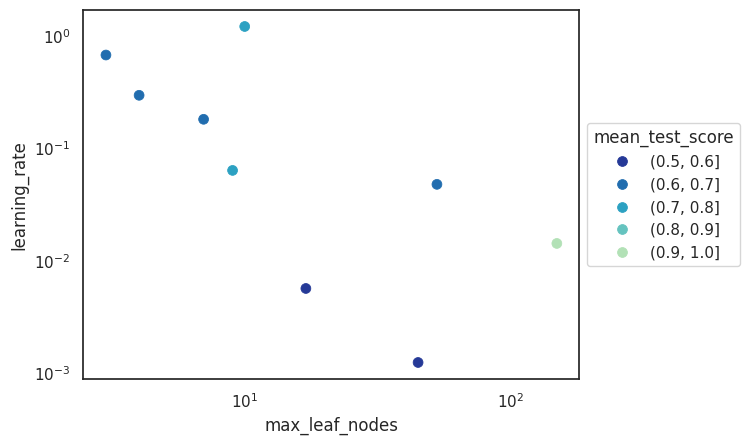

In [ ]:
import seaborn as sns
import numpy as np

df = pd.DataFrame(
    {
        "max_leaf_nodes": cv_results["max_leaf_nodes"],
        "learning_rate": cv_results["learning_rate"],
        "score_bin": pd.cut(
            cv_results["mean_test_score"], bins=np.linspace(0.5, 1.0, 6)
        ),
    }
)
sns.set_palette("YlGnBu_r")
ax = sns.scatterplot(
    data=df,
    x="max_leaf_nodes",
    y="learning_rate",
    hue="score_bin",
    s=50,
    color="k",
    edgecolor=None,
)
ax.set_xscale("log")
ax.set_yscale("log")

_ = ax.legend(
    title="mean_test_score", loc="center left", bbox_to_anchor=(1, 0.5)
)

In [ ]:
import numpy as np
import plotly.express as px

# Rest of your code
log10_func = np.vectorize(np.log10)
log2_func = np.vectorize(np.log2)

fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply({
        "learning_rate": log10_func,
        "max_leaf_nodes": log2_func,
        "min_samples_leaf": log2_func,
        "max_bins": log10_func,
        "l2_regularization": log10_func,
        "mean_test_score": lambda x: x,
    }),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show()

In [ ]:
# Deriving Predictions

predictions = Test.copy()
predictions["customer_category"] = model_random_search.predict(Test)

predictions.to_csv("Predictions.csv", index=False)


# <a id='toc8_'></a>[References](#toc0_)
- [Scikit Learn MOOC](https://inria.github.io/scikit-learn-mooc/)
- [Australian Bureau of Statistics](https://www.abs.gov.au/statistics)
- [Australian Postcodes](https://www.matthewproctor.com/australian_postcodes)
- [Scikit Learn](https://scikit-learn.org/stable/)
- [Geopandas](https://geopandas.org/)
- [Plotly](https://plotly.com/)
- [Seaborn](https://seaborn.pydata.org/)
- [Pandas](https://pandas.pydata.org/)
- [Numpy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Folium](https://python-visualization.github.io/folium/)
- [Geopy](https://geopy.readthedocs.io/en/stable/)
- [Scipy](https://www.scipy.org/)
- [Shapely](https://shapely.readthedocs.io/en/stable/)